In [23]:
import pandas as pd
import numpy as np
# from date import date
from datetime import date


In [24]:
import jdatetime

# Define a Shamsi date
shamsi_year = 1403
shamsi_month = 4
shamsi_day = 26

# Create a jdatetime.date object
shamsi_date = jdatetime.date(shamsi_year, shamsi_month, shamsi_day)

# Convert the Shamsi date to a Gregorian date
miladi_date = shamsi_date.togregorian()

In [25]:
miladi_date


datetime.date(2024, 7, 16)

In [26]:
raw_data = pd.read_csv(open('Medical_records.csv', 'rb'))



In [27]:
raw_data.head()


,N,Admission Date (Shamsi),Age,Sex,Main Agent,Discharge Status,Multiple Agents,Alcohol,Opium,Benzodiazepines,Drugs,Organophosphates
0,4160120,1399/01/06,49,M,Opium,B,NaN,NaN,NaN,NaN,NaN,NaN
1,4160616,1399/01/07,28,M,Opium*,B,NaN,NaN,NaN,NaN,NaN,NaN
2,4162104,1399/01/12,26,M,Drug,B,NaN,NaN,NaN,NaN,NaN,NaN
3,4162282,1399/01/13,24,F,Alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN
4,4162926,1399/01/15,21,M,Drug/ Alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
raw_data.columns


Index(['N', 'Admission Date (Shamsi)', 'Age', 'Sex', 'Main Agent',
       'Discharge Status', 'Multiple Agents', 'Alcohol', 'Opium',
       'Benzodiazepines', 'Drugs', 'Organophosphates'],
      dtype='object')

In [43]:
raw_data['Main Agent'].unique()


array(['opium', 'drug', 'alcohol', 'drug and alcohol', 'benzodiazepin',
       'lead', 'chemical', 'opium and alcohol', 'organophosphate',
       'opium and canabbis', 'benzodiazepin and opium', 'cannabis',
       'cannabis and alcohol', 'benzodiazepin and alcohol'], dtype=object)

In [58]:
import re
def remove_drug(t_):
    t_ = t_.replace('Drug*', 'Benzodiazepin')
    t_ = t_.replace('Opium*', 'Opium') 
    t_ = t_.replace('Rodenticides', 'Organophosphate')
    t_ = t_.replace('Petroleum','Chemical')
    t_ = t_.replace('/', ' and')
    t_ = t_.replace('Alcohol and Opium', 'Opium and Alcohol')
    t_ = t_.replace('Cannabis/ Alcohol', 'Alcohol/ Cannabis')
    t_ = t_.replace('canabbis', 'cannabis')
    t_ = t_.replace('benzodiazepin', 'benzodiazepine')
    return t_.strip().lower()

drug_parsed = []
for i, d in raw_data.iterrows():
    drug_parsed.append(remove_drug(d['Main Agent']))
raw_data['Main Agent'] = drug_parsed

    

In [59]:
def time_fixer(obj_):
    obj_ = [x.strip() for x in obj_.split('/')]
    if len(str(obj_[0]).strip()) ==4:
        return jdatetime.date(int(obj_[0]), int(obj_[1]), int(obj_[2])).togregorian()
    elif len(str(obj_[2]).strip()) ==4:
        return jdatetime.date(int(obj_[2]), int(obj_[1]), int(obj_[0])).togregorian()
    else:
        print(obj_, 'is not compatiblae')

In [60]:
correct_date = []
for i, d in raw_data.iterrows():
    correct_date.append(time_fixer(d['Admission Date (Shamsi)']))
    
raw_data['date'] = correct_date

In [61]:
raw_data.head()

,N,Admission Date (Shamsi),Age,Sex,Main Agent,Discharge Status,Multiple Agents,Alcohol,Opium,Benzodiazepines,Drugs,Organophosphates,date
0,4160120,1399/01/06,49,M,opium,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-25
1,4160616,1399/01/07,28,M,opium,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26
2,4162104,1399/01/12,26,M,drug,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31
3,4162282,1399/01/13,24,F,alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01
4,4162926,1399/01/15,21,M,drug and alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-03


In [62]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   N                        3972 non-null   int64  
 1   Admission Date (Shamsi)  3972 non-null   object 
 2   Age                      3972 non-null   int64  
 3   Sex                      3972 non-null   object 
 4   Main Agent               3972 non-null   object 
 5   Discharge Status         3972 non-null   object 
 6   Multiple Agents          0 non-null      float64
 7   Alcohol                  0 non-null      float64
 8   Opium                    0 non-null      float64
 9   Benzodiazepines          0 non-null      float64
 10  Drugs                    0 non-null      float64
 11  Organophosphates         0 non-null      float64
 12  date                     3972 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 403.5+ KB


In [63]:
data = raw_data[['N', 'Admission Date (Shamsi)', 'Age', 'Sex', 'Main Agent',
       'Discharge Status', 'date']]
data = data.drop(['N', 'Admission Date (Shamsi)'], axis=1)

In [64]:
data.head()

,Age,Sex,Main Agent,Discharge Status,date
0,49,M,opium,B,2020-03-25
1,28,M,opium,B,2020-03-26
2,26,M,drug,B,2020-03-31
3,24,F,alcohol,B,2020-04-01
4,21,M,drug and alcohol,B,2020-04-03


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               3972 non-null   int64 
 1   Sex               3972 non-null   object
 2   Main Agent        3972 non-null   object
 3   Discharge Status  3972 non-null   object
 4   date              3972 non-null   object
dtypes: int64(1), object(4)
memory usage: 155.3+ KB


In [66]:
for c in data.columns:
    print('##### {} #####'.format(c))
    print(data[c].describe())
    print('\n\n')

##### Age #####
count    3972.000000
mean       30.066717
std        12.954751
min        14.000000
25%        20.000000
50%        28.000000
75%        37.000000
max        96.000000
Name: Age, dtype: float64



##### Sex #####
count     3972
unique       2
top          M
freq      2242
Name: Sex, dtype: object



##### Main Agent #####
count     3972
unique      14
top       drug
freq      1274
Name: Main Agent, dtype: object



##### Discharge Status #####
count     3972
unique       4
top          B
freq      1796
Name: Discharge Status, dtype: object



##### date #####
count           3972
unique          1011
top       2022-05-01
freq              29
Name: date, dtype: object





In [67]:
df = data

In [78]:
df.columns

Index(['Age', 'Sex', 'Main Agent', 'Discharge Status', 'date'], dtype='object')

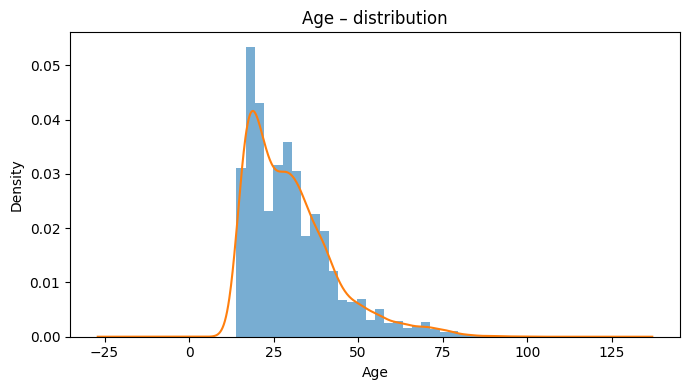

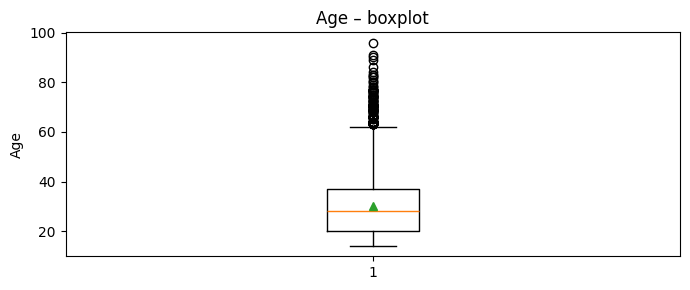

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_1580/4261983170.py:166: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  elif _is_datetime(s) or (s.dtype == "object" and pd.to_datetime(s, errors="coerce").notna().mean() > 0.5):
/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_1580/4261983170.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(s) or s.dtype == "object" or pd.api.types.is_string_dtype(s)


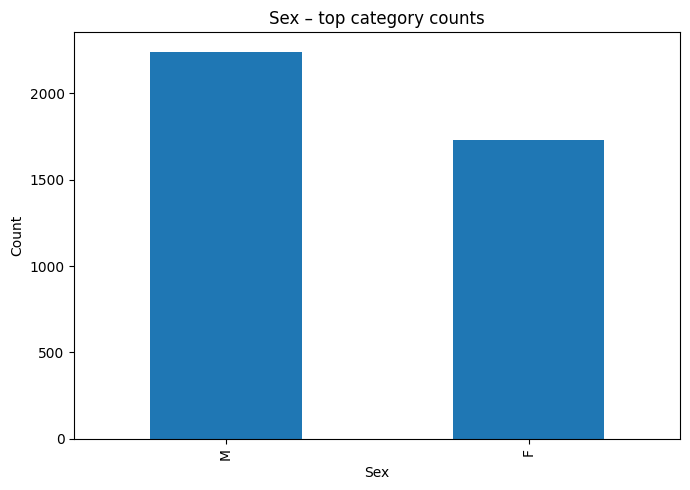

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_1580/4261983170.py:166: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  elif _is_datetime(s) or (s.dtype == "object" and pd.to_datetime(s, errors="coerce").notna().mean() > 0.5):
/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_1580/4261983170.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(s) or s.dtype == "object" or pd.api.types.is_string_dtype(s)


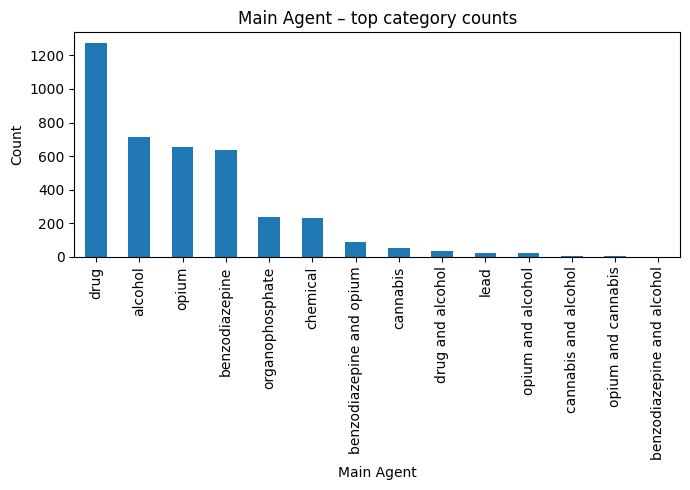

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_1580/4261983170.py:166: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  elif _is_datetime(s) or (s.dtype == "object" and pd.to_datetime(s, errors="coerce").notna().mean() > 0.5):
/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_1580/4261983170.py:30: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(s) or s.dtype == "object" or pd.api.types.is_string_dtype(s)


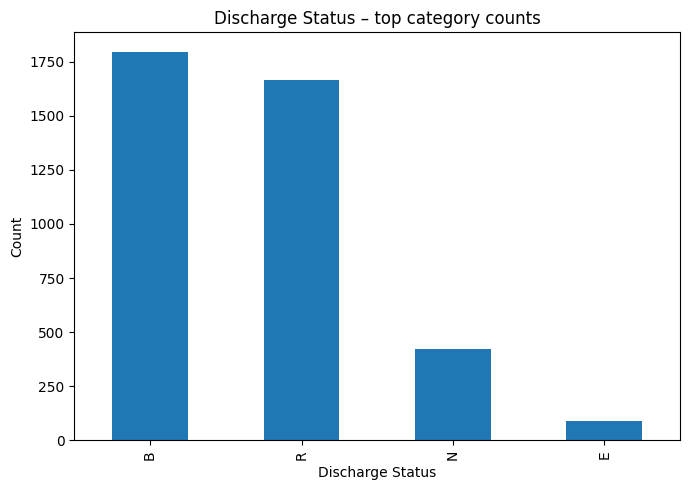

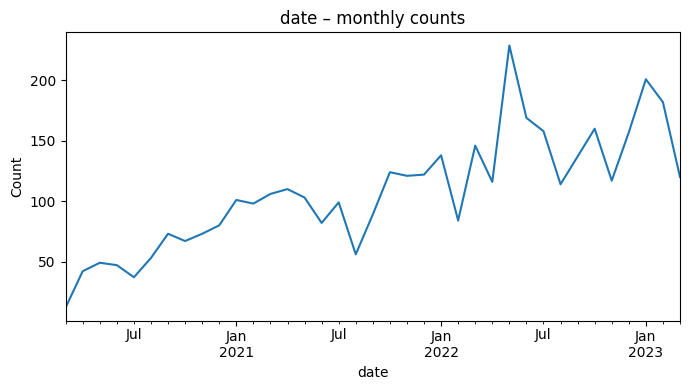

,column,dtype,count,missing,n_unique,min,p25,median,p75,max,mean,std
0,Age,numeric,3972,0,76.0,14.0,20.0,28.0,37.0,96.0,30.066717,12.954751
1,Sex,categorical,3972,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Main Agent,categorical,3972,0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Discharge Status,categorical,3972,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,date,datetime,3972,0,NaN,2020-03-20 00:00:00,NaN,NaN,NaN,2023-03-20 00:00:00,NaN,NaN


In [80]:
# column_profile.py

from __future__ import annotations
import os
from typing import Dict, Any, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def _ensure_dir(path: Optional[str]):
    if path:
        os.makedirs(path, exist_ok=True)


def _is_datetime(s: pd.Series) -> bool:
    return pd.api.types.is_datetime64_any_dtype(s) or pd.api.types.is_datetime64_ns_dtype(s)


def _is_numeric(s: pd.Series) -> bool:
    return pd.api.types.is_numeric_dtype(s)


def _is_bool(s: pd.Series) -> bool:
    return pd.api.types.is_bool_dtype(s)


def _is_categorical(s: pd.Series) -> bool:
    return pd.api.types.is_categorical_dtype(s) or s.dtype == "object" or pd.api.types.is_string_dtype(s)


def _describe_numeric(s: pd.Series) -> Dict[str, Any]:
    s_clean = pd.to_numeric(s, errors="coerce")
    desc = {
        "count": int(s_clean.notna().sum()),
        "missing": int(s_clean.isna().sum()),
        "mean": float(s_clean.mean()) if s_clean.notna().any() else np.nan,
        "std": float(s_clean.std()) if s_clean.notna().any() else np.nan,
        "min": float(s_clean.min()) if s_clean.notna().any() else np.nan,
        "p25": float(s_clean.quantile(0.25)) if s_clean.notna().any() else np.nan,
        "median": float(s_clean.median()) if s_clean.notna().any() else np.nan,
        "p75": float(s_clean.quantile(0.75)) if s_clean.notna().any() else np.nan,
        "max": float(s_clean.max()) if s_clean.notna().any() else np.nan,
        "skew": float(s_clean.skew()) if s_clean.notna().any() else np.nan,
        "kurtosis": float(s_clean.kurt()) if s_clean.notna().any() else np.nan,
        "n_unique": int(s_clean.nunique(dropna=True)),
    }
    # IQR-based outlier thresholds
    q1, q3 = s_clean.quantile([0.25, 0.75])
    iqr = q3 - q1
    if np.isfinite(iqr):
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        desc.update({
            "iqr": float(iqr),
            "low_outlier_thr": float(low),
            "high_outlier_thr": float(high),
            "pct_below_low": float((s_clean < low).mean() * 100) if s_clean.notna().any() else np.nan,
            "pct_above_high": float((s_clean > high).mean() * 100) if s_clean.notna().any() else np.nan,
        })
    return desc


def _describe_categorical(s: pd.Series, top_k: int = 10) -> Dict[str, Any]:
    s_str = s.astype("string")
    vc = s_str.value_counts(dropna=True)
    mode_val = vc.index[0] if len(vc) else np.nan
    mode_freq = int(vc.iloc[0]) if len(vc) else 0
    return {
        "count": int(s_str.notna().sum()),
        "missing": int(s_str.isna().sum()),
        "n_unique": int(s_str.nunique(dropna=True)),
        "mode": mode_val,
        "mode_freq": mode_freq,
        "top_k": vc.head(top_k).to_dict()
    }


def _describe_bool(s: pd.Series) -> Dict[str, Any]:
    s_bool = s.astype("boolean")
    vc = s_bool.value_counts(dropna=False)
    return {
        "count": int(s_bool.notna().sum()),
        "missing": int(s_bool.isna().sum()),
        "pct_true": float((s_bool == True).mean() * 100),
        "pct_false": float((s_bool == False).mean() * 100),
        "value_counts": vc.to_dict()
    }


def _describe_datetime(s: pd.Series) -> Dict[str, Any]:
    s_dt = pd.to_datetime(s, errors="coerce")
    return {
        "count": int(s_dt.notna().sum()),
        "missing": int(s_dt.isna().sum()),
        "min": s_dt.min(),
        "max": s_dt.max(),
        "years_span": float(((s_dt.max() - s_dt.min()).days / 365.25)) if s_dt.notna().any() else np.nan
    }


def analyze_columns(
    df: pd.DataFrame,
    output_dir: Optional[str] = None,
    show_plots: bool = True,
    bins: int = 30,
    max_cats: int = 25,
    figsize=(7,4),
) -> Dict[str, Any]:
    """
    Profile each column: summary table, histogram/bar plot, and text description.

    Parameters
    ----------
    df : pd.DataFrame
    output_dir : optional path to save PNGs and CSVs
    show_plots : show figures inline
    bins : histogram bins for numeric
    max_cats : max categories to display in a bar chart
    figsize : matplotlib figure size

    Returns
    -------
    {
      "column_summaries": pd.DataFrame,
      "per_column": {
          col: {
            "type": "numeric|categorical|datetime|boolean|unknown",
            "summary": dict,
            "description": str,
            "value_counts": pd.Series (when relevant)
          }, ...
      }
    }
    """
    _ensure_dir(output_dir)
    results: Dict[str, Any] = {"per_column": {}}

    # Build a unified summary table
    rows = []
    for col in df.columns:
        s = df[col]
        col_info: Dict[str, Any] = {"type": None, "summary": None, "description": "", "value_counts": None}
        dtype = str(s.dtype)

        # Type detection
        if _is_bool(s):
            coltype = "boolean"
            summary = _describe_bool(s)
            vc = s.astype("boolean").value_counts(dropna=False)
            desc = (f"Boolean column '{col}' with {summary['count']} non-missing values. "
                    f"{summary['pct_true']:.1f}% True, {summary['pct_false']:.1f}% False. "
                    f"Missing: {summary['missing']}.")
            # Plot
            fig = plt.figure(figsize=figsize)
            vc.plot(kind='bar')
            plt.title(f"{col} – value counts")
            plt.ylabel("Count")
            plt.tight_layout()
            if output_dir:
                fig.savefig(os.path.join(output_dir, f"{col}_bar.png"), dpi=150)
            if show_plots:
                plt.show()

        elif _is_datetime(s) or (s.dtype == "object" and pd.to_datetime(s, errors="coerce").notna().mean() > 0.5):
            coltype = "datetime"
            s_dt = pd.to_datetime(s, errors="coerce")
            summary = _describe_datetime(s_dt)
            desc = (f"Datetime column '{col}' with {summary['count']} valid timestamps, "
                    f"range {summary['min']} → {summary['max']} "
                    f"({summary['years_span']:.2f} years). Missing: {summary['missing']}.")
            # Plot (counts by month)
            if summary["count"] > 0:
                idx = s_dt.dropna()
                ts = pd.Series(1, index=idx).resample("MS").sum().fillna(0)
                fig = plt.figure(figsize=figsize)
                ts.plot()
                plt.title(f"{col} – monthly counts")
                plt.ylabel("Count")
                plt.tight_layout()
                if output_dir:
                    fig.savefig(os.path.join(output_dir, f"{col}_monthly_counts.png"), dpi=150)
                if show_plots:
                    plt.show()

        elif _is_numeric(s):
            coltype = "numeric"
            summary = _describe_numeric(s)
            desc = (f"Numeric column '{col}' (n={summary['count']}, missing={summary['missing']}): "
                    f"mean={summary['mean']:.2f}, sd={summary['std']:.2f}, "
                    f"min={summary['min']:.2f}, p25={summary['p25']:.2f}, "
                    f"median={summary['median']:.2f}, p75={summary['p75']:.2f}, max={summary['max']:.2f}. "
                    f"skew={summary['skew']:.2f}, kurtosis={summary['kurtosis']:.2f}.")
            # Histogram + KDE + Boxplot
            s_clean = pd.to_numeric(s, errors="coerce").dropna()
            if len(s_clean):
                fig = plt.figure(figsize=figsize)
                s_clean.plot(kind="hist", bins=bins, density=True, alpha=0.6)
                s_clean.plot(kind="kde")
                plt.title(f"{col} – distribution")
                plt.xlabel(col)
                plt.ylabel("Density")
                plt.tight_layout()
                if output_dir:
                    fig.savefig(os.path.join(output_dir, f"{col}_hist.png"), dpi=150)
                if show_plots:
                    plt.show()

                fig = plt.figure(figsize=(figsize[0], max(figsize[1]-1, 3)))
                plt.boxplot(s_clean.values, vert=True, showmeans=True)
                plt.title(f"{col} – boxplot")
                plt.ylabel(col)
                plt.tight_layout()
                if output_dir:
                    fig.savefig(os.path.join(output_dir, f"{col}_box.png"), dpi=150)
                if show_plots:
                    plt.show()

        elif _is_categorical(s):
            coltype = "categorical"
            s_cat = s.astype("string")
            summary = _describe_categorical(s_cat)
            vc = s_cat.value_counts(dropna=False)
            col_info["value_counts"] = vc
            top_show = vc.head(max_cats)
            more = max(0, len(vc) - len(top_show))
            desc = (f"Categorical column '{col}' with {summary['count']} non-missing values, "
                    f"{summary['n_unique']} unique levels. "
                    f"Mode='{summary['mode']}' (n={summary['mode_freq']}). "
                    f"Missing: {summary['missing']}. "
                    f"Showing top {len(top_show)} categories"
                    + (f" (+{more} more)" if more else "") + ".")
            # Bar plot (top categories)
            fig = plt.figure(figsize=(max(figsize[0], 7), figsize[1]+1))
            top_show.plot(kind='bar')
            plt.title(f"{col} – top category counts")
            plt.ylabel("Count")
            plt.tight_layout()
            if output_dir:
                fig.savefig(os.path.join(output_dir, f"{col}_bar.png"), dpi=150)
            if show_plots:
                plt.show()

        else:
            coltype = "unknown"
            summary = {
                "count": int(s.notna().sum()),
                "missing": int(s.isna().sum()),
                "n_unique": int(s.nunique(dropna=True)),
                "dtype": dtype
            }
            desc = f"Column '{col}' has unrecognized type ({dtype}). Count={summary['count']}, missing={summary['missing']}."

        # Persist per-column info
        col_info["type"] = coltype
        col_info["summary"] = summary
        col_info["description"] = desc
        results["per_column"][col] = col_info

        # Row for global table
        rows.append({
            "column": col,
            "dtype": coltype,
            "count": summary.get("count", np.nan),
            "missing": summary.get("missing", np.nan),
            "n_unique": summary.get("n_unique", np.nan),
            "min": summary.get("min", np.nan),
            "p25": summary.get("p25", np.nan),
            "median": summary.get("median", np.nan),
            "p75": summary.get("p75", np.nan),
            "max": summary.get("max", np.nan),
            "mean": summary.get("mean", np.nan),
            "std": summary.get("std", np.nan),
        })

    column_summaries = pd.DataFrame(rows)
    results["column_summaries"] = column_summaries

    # Save outputs
    if output_dir:
        column_summaries.to_csv(os.path.join(output_dir, "column_summaries.csv"), index=False)
        # Save value_counts for categoricals
        for col, info in results["per_column"].items():
            if info["type"] in ("categorical", "boolean") and info.get("value_counts") is not None:
                info["value_counts"].to_csv(os.path.join(output_dir, f"{col}_value_counts.csv"))

        # Write machine-readable descriptions
        with open(os.path.join(output_dir, "column_descriptions.txt"), "w", encoding="utf-8") as f:
            for col, info in results["per_column"].items():
                f.write(f"[{col}] {info['description']}\n")

    return results


# -------------------------
# Example usage (commented)
# -------------------------
import pandas as pd

res = analyze_columns(df, output_dir="column_report", show_plots=True)
res["column_summaries"]  # a nice table of all columns

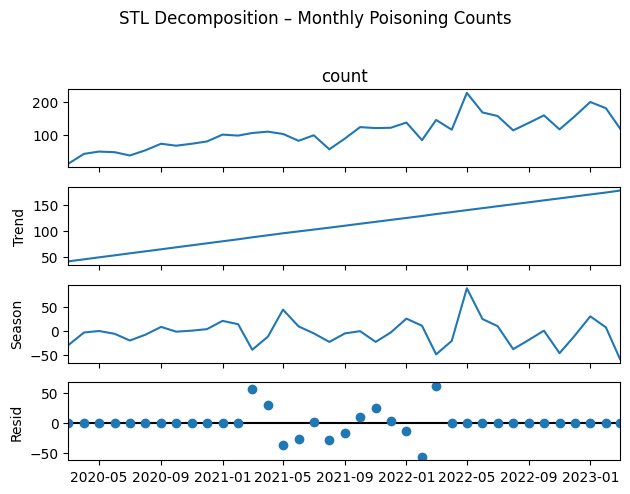

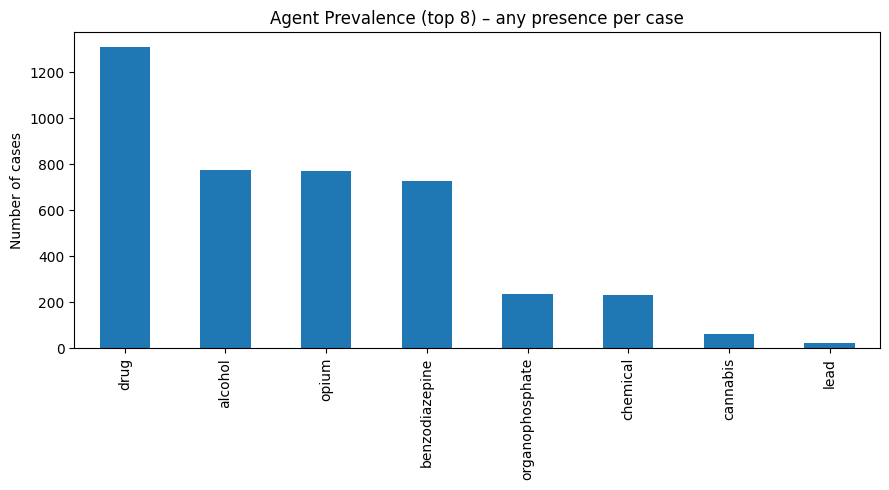

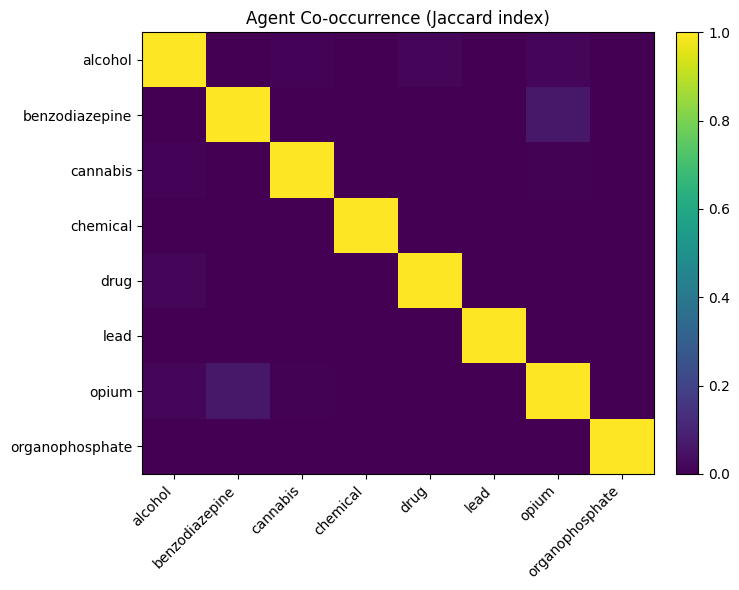

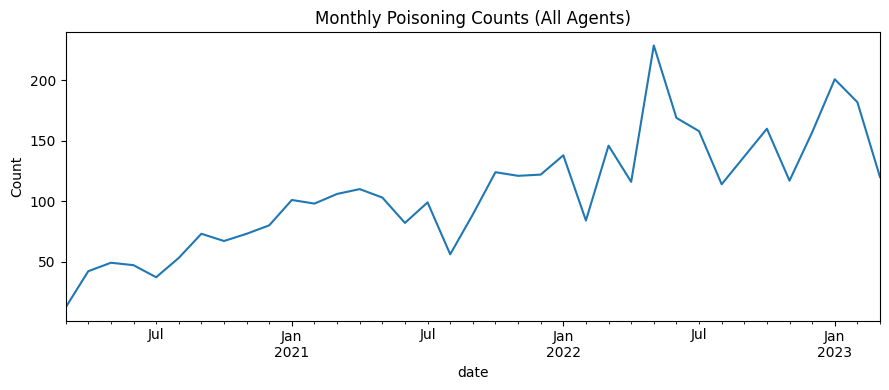

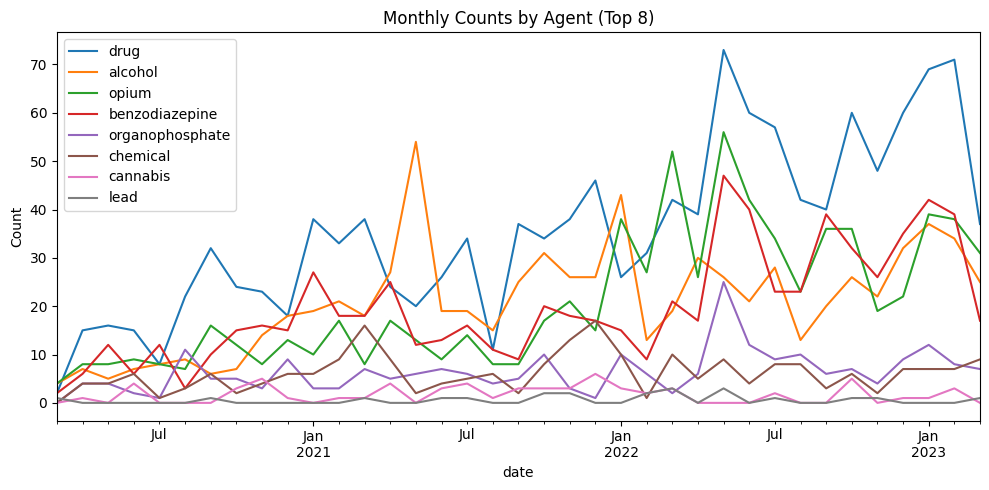

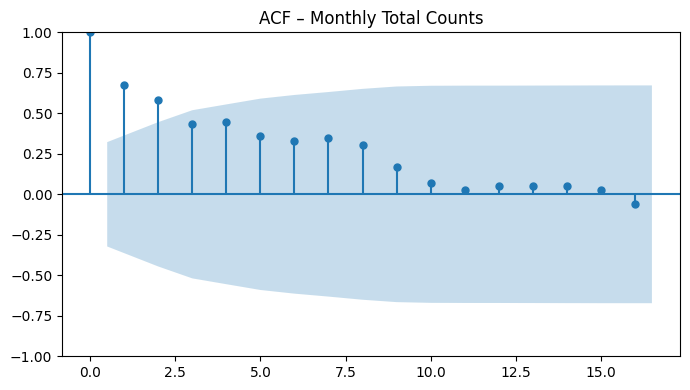

In [81]:
# poison_multiagent_analysis.py

from __future__ import annotations
import os
import re
import warnings
from dataclasses import dataclass, field
from typing import Dict, List, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore", category=FutureWarning)

# -----------------------------
# Vocab & normalization
# -----------------------------
VALID_AGENTS = {
    'opium', 'drug', 'alcohol', 'benzodiazepine', 'lead', 'chemical',
    'organophosphate', 'cannabis'
}
# map simple plurals/synonyms to canonical labels
AGENT_SYNONYMS = {
    'benzodiazepines': 'benzodiazepine',
    'benzodiazepine and opium': 'benzodiazepine and opium',  # kept for legacy strings; will get split anyway
    'opioid': 'opium',
    'opioids': 'opium',
    'weed': 'cannabis',
    'ethanol': 'alcohol',
    'drugs': 'drug'
}

VALID_SEX = {'M', 'F'}
VALID_STATUS = {'B', 'E', 'N', 'R'}

SEASON_MAP = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn",
}

def _ensure_dir(path: Optional[str]):
    if path:
        os.makedirs(path, exist_ok=True)

def _norm_text(x: str) -> str:
    if pd.isna(x):
        return x
    s = str(x).strip().lower()
    s = AGENT_SYNONYMS.get(s, s)
    return s

def _split_agents(x: str) -> List[str]:
    """Split 'a and b and c' -> ['a','b','c'], normalize, drop empties."""
    if pd.isna(x):
        return []
    s = _norm_text(x)
    parts = re.split(r'\s*and\s*', s)  # split by the word "and"
    parts = [p.strip() for p in parts if p.strip()]
    # Map synonyms again per token and keep only known/other
    cleaned = []
    for p in parts:
        p = AGENT_SYNONYMS.get(p, p)
        cleaned.append(p)
    return cleaned

def _categorize_agent(token: str) -> str:
    return token if token in VALID_AGENTS else 'other'

def _cramers_v(ct: pd.DataFrame) -> float:
    chi2 = stats.chi2_contingency(ct, correction=False)[0]
    n = ct.values.sum()
    phi2 = chi2 / max(n, 1)
    r, k = ct.shape
    # Bias-corrected Cramér’s V
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1 if n>1 else 1))
    rcorr = r - ((r-1)**2)/(n-1 if n>1 else 1)
    kcorr = k - ((k-1)**2)/(n-1 if n>1 else 1)
    denom = max(1e-12, min(kcorr-1, rcorr-1))
    return float(np.sqrt(phi2corr / denom)) if denom > 0 else 0.0

def _chi2(df: pd.DataFrame, a: str, b: str):
    t = pd.crosstab(df[a], df[b])
    chi2, p, dof, _ = stats.chi2_contingency(t)
    return {"table": t, "chi2": float(chi2), "p_value": float(p), "dof": int(dof), "cramers_v": _cramers_v(t)}

def _age_tests(df: pd.DataFrame, by: str, min_group=10):
    groups = [(k, g['Age'].dropna().values) for k, g in df.groupby(by) if len(g) >= min_group]
    res = {"by": by, "anova": None, "kruskal": None, "groups": [k for k, _ in groups]}
    if len(groups) >= 2:
        arrays = [arr for _, arr in groups if len(arr)]
        if len(arrays) >= 2:
            f, p1 = stats.f_oneway(*arrays)
            h, p2 = stats.kruskal(*arrays)
            res["anova"] = {"F": float(f), "p_value": float(p1)}
            res["kruskal"] = {"H": float(h), "p_value": float(p2)}
    return res

@dataclass
class MultiAgentOutputs:
    cleaned_df: pd.DataFrame             # original rows with cleaned basics
    long_agents_df: pd.DataFrame         # exploded rows (one agent per row)
    multi_hot: pd.DataFrame              # one column per agent (0/1)
    descriptions: Dict[str, pd.DataFrame]
    associations: Dict[str, dict]
    age_tests: Dict[str, dict]
    cooccurrence: pd.DataFrame
    time_series: Dict[str, pd.DataFrame]
    stl_summary: Optional[Dict[str, float]] = None
    notes: Dict[str, str] = field(default_factory=dict)

# -----------------------------
# Main function
# -----------------------------
def analyze_poisonings_multiagent(
    df: pd.DataFrame,
    output_dir: Optional[str] = None,
    show_plots: bool = True,
    frequency: str = "MS",
    stl_period: int = 12,
    top_k_agents_plot: int = 8
) -> MultiAgentOutputs:
    """
    Perform the same analyses as the single-agent pipeline but allow multi-agent entries
    separated by 'and'. Builds a multi-hot matrix and provides per-agent, per-combination,
    and overall statistics, associations, and seasonality.
    """
    _ensure_dir(output_dir)
    notes = {}

    # ----------------- Cleaning base columns -----------------
    required = ['Age', 'Sex', 'Main Agent', 'Discharge Status', 'date']
    miss = [c for c in required if c not in df.columns]
    if miss:
        raise ValueError(f"Missing required columns: {miss}")

    data = df.copy()
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
    data['Sex'] = data['Sex'].astype('string').str.strip().str.upper().map({'M':'M','F':'F'})
    data['Sex'] = data['Sex'].where(data['Sex'].isin(VALID_SEX), other='other')
    data['Discharge Status'] = data['Discharge Status'].astype('string').str.strip().str.upper()
    data['Discharge Status'] = data['Discharge Status'].where(data['Discharge Status'].isin(VALID_STATUS), other='other')
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

    n0 = len(data)
    data = data[data['date'].notna()]
    if len(data) < n0:
        notes['dropped_invalid_dates'] = f"Dropped {n0 - len(data)} rows with invalid dates."

    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['season'] = data['month'].map(SEASON_MAP)

    # ----------------- Multi-agent parsing -----------------
    agent_lists = data['Main Agent'].astype('string').apply(_split_agents)
    # Tag unknowns as 'other'
    agent_lists = agent_lists.apply(lambda lst: [ _categorize_agent(tok) for tok in lst ] if isinstance(lst, list) else [])
    # If a row had no recognizable tokens, set ['other'] to preserve info
    agent_lists = agent_lists.apply(lambda lst: lst if len(lst) else ['other'])

    data = data.assign(agent_list=agent_lists)

    # Explode to long format (each agent gets a row)
    long = data.explode('agent_list').rename(columns={'agent_list':'Agent'})
    long['Agent'] = long['Agent'].astype('string')

    # Multi-hot matrix (one row per original record)
    # We'll include 'other' as a dedicated column so totals match
    all_agents = sorted(set(a for lst in agent_lists for a in lst))
    multi_hot = pd.DataFrame(0, index=data.index, columns=all_agents, dtype=int)
    for idx, lst in agent_lists.items():
        for a in lst:
            multi_hot.at[idx, a] = 1
    multi_hot.index.name = 'row_id'

    # ----------------- Descriptions -----------------
    desc_overall = pd.DataFrame({
        'n_rows': [len(data)],
        'n_with_multi_agents': [int((agent_lists.apply(len) > 1).sum())],
        'share_multi_agents_%': [float((agent_lists.apply(len) > 1).mean() * 100)],
        'min_date': [data['date'].min()],
        'max_date': [data['date'].max()]
    })

    desc_age = pd.DataFrame({
        'count': [data['Age'].notna().sum()],
        'mean': [data['Age'].mean()],
        'std': [data['Age'].std()],
        'min': [data['Age'].min()],
        'p25': [data['Age'].quantile(0.25)],
        'median': [data['Age'].median()],
        'p75': [data['Age'].quantile(0.75)],
        'max': [data['Age'].max()],
    })

    # Per-agent prevalence (ANY presence in a row)
    agent_prevalence = multi_hot.sum(axis=0).sort_values(ascending=False).rename('count').to_frame()
    agent_prevalence['percent'] = 100 * agent_prevalence['count'] / len(multi_hot)

    # Co-occurrence (Jaccard & raw)
    # Raw co-occurrence counts (how many rows contain both)
    raw_co = multi_hot.T.dot(multi_hot)
    # Jaccard = intersection / union
    diag = np.diag(raw_co)
    unions = diag.reshape(-1,1) + diag.reshape(1,-1) - raw_co.values
    with np.errstate(divide='ignore', invalid='ignore'):
        jaccard = np.where(unions>0, raw_co.values / unions, 0.0)
    jaccard = pd.DataFrame(jaccard, index=raw_co.index, columns=raw_co.columns)

    # ----------------- Associations -----------------
    associations = {}

    # Sex vs presence of each agent; Status vs presence of each agent
    for a in all_agents:
        tmp = data[['Sex','Discharge Status']].copy()
        tmp[a] = multi_hot[a].values
        tmp[a] = tmp[a].map({0:'absent', 1:'present'})
        associations[f'Sex_vs_{a}'] = _chi2(tmp, 'Sex', a)
        associations[f'Status_vs_{a}'] = _chi2(tmp, 'Discharge Status', a)

    # Age by agent presence (two-group comparison: present vs absent)
    age_tests = {}
    for a in all_agents:
        tmp = data[['Age']].copy()
        tmp[a] = multi_hot[a].map({0:'absent', 1:'present'})
        age_tests[f'Age_by_{a}_presence'] = _age_tests(tmp.assign(group=tmp[a]), 'group', min_group=10)

    # Age by count of agents (single vs multi)
    data['n_agents'] = agent_lists.apply(len)
    data['agent_count_group'] = np.where(data['n_agents']>1, 'multi', 'single')
    age_tests['Age_by_agent_count_group'] = _age_tests(data.rename(columns={'agent_count_group':'group'}), 'group', min_group=10)

    # ----------------- Time series (any presence per agent) -----------------
    ts = data.set_index('date').sort_index()
    monthly_total = ts['Age'].resample(frequency).size().rename('count').to_frame()

    monthly_by_agent = {}
    for a in all_agents:
        s = multi_hot[a]
        # align to ts index
        s.index = ts.index
        monthly_by_agent[a] = s.resample(frequency).sum()
    monthly_by_agent = pd.DataFrame(monthly_by_agent).fillna(0)

    # STL on total counts (if enough data)
    stl_summary = None
    if len(monthly_total) >= max(24, 2*stl_period):
        series = monthly_total['count'].asfreq(frequency).fillna(0)
        res = STL(series, period=stl_period, robust=True).fit()
        # strength estimates
        y = res.trend + res.seasonal + res.resid
        var_y = np.var(y)
        var_res = np.var(res.resid)
        var_trend_res = np.var(res.trend + res.resid)
        seasonality_strength = max(0.0, 1 - var_res / max(var_trend_res, 1e-9))
        trend_strength = max(0.0, 1 - var_res / max(var_y - np.var(res.seasonal), 1e-9))
        stl_summary = {"seasonality_strength": float(seasonality_strength), "trend_strength": float(trend_strength)}

        if show_plots:
            fig = res.plot()
            fig.suptitle('STL Decomposition – Monthly Poisoning Counts', y=1.02)
            fig.tight_layout()
            if output_dir:
                fig.savefig(os.path.join(output_dir, 'stl_multiagent.png'), dpi=150)
            plt.show()

    # ----------------- Plots -----------------
    if show_plots:
        # Agent prevalence bar (top K)
        fig = plt.figure(figsize=(9, 5))
        agent_prevalence['count'].head(top_k_agents_plot).plot(kind='bar')
        plt.title(f'Agent Prevalence (top {top_k_agents_plot}) – any presence per case')
        plt.ylabel('Number of cases')
        plt.tight_layout()
        if output_dir:
            fig.savefig(os.path.join(output_dir, 'agent_prevalence.png'), dpi=150)
        plt.show()

        # Co-occurrence heatmap (Jaccard)
        fig = plt.figure(figsize=(7.5, 6))
        im = plt.imshow(jaccard.values, aspect='auto')
        plt.xticks(range(len(jaccard.columns)), jaccard.columns, rotation=45, ha='right')
        plt.yticks(range(len(jaccard.index)), jaccard.index)
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.title('Agent Co-occurrence (Jaccard index)')
        plt.tight_layout()
        if output_dir:
            fig.savefig(os.path.join(output_dir, 'agent_cooccurrence_jaccard.png'), dpi=150)
        plt.show()

        # Monthly total counts
        fig = plt.figure(figsize=(9, 4))
        monthly_total['count'].plot()
        plt.title('Monthly Poisoning Counts (All Agents)')
        plt.ylabel('Count')
        plt.tight_layout()
        if output_dir:
            fig.savefig(os.path.join(output_dir, 'monthly_total.png'), dpi=150)
        plt.show()

        # Monthly counts by top agents
        top_agents = agent_prevalence.index[:top_k_agents_plot]
        fig = plt.figure(figsize=(10, 5))
        monthly_by_agent[top_agents].plot(ax=plt.gca())
        plt.title(f'Monthly Counts by Agent (Top {top_k_agents_plot})')
        plt.ylabel('Count')
        plt.tight_layout()
        if output_dir:
            fig.savefig(os.path.join(output_dir, 'monthly_by_agent.png'), dpi=150)
        plt.show()

        # ACF of total monthly counts
        fig = plt.figure(figsize=(7, 4))
        plot_acf(monthly_total['count'], ax=plt.gca(), title='ACF – Monthly Total Counts', missing='conservative')
        plt.tight_layout()
        if output_dir:
            fig.savefig(os.path.join(output_dir, 'acf_total.png'), dpi=150)
        plt.show()

    # ----------------- Save tables -----------------
    if output_dir:
        desc_overall.to_csv(os.path.join(output_dir, 'overall_summary.csv'), index=False)
        desc_age.to_csv(os.path.join(output_dir, 'age_summary.csv'), index=False)
        agent_prevalence.to_csv(os.path.join(output_dir, 'agent_prevalence.csv'))
        raw_co.to_csv(os.path.join(output_dir, 'agent_cooccurrence_raw.csv'))
        jaccard.to_csv(os.path.join(output_dir, 'agent_cooccurrence_jaccard.csv'))
        multi_hot.to_csv(os.path.join(output_dir, 'multi_hot_agents.csv'))
        long.to_csv(os.path.join(output_dir, 'long_agents_rows.csv'), index=False)
        monthly_total.to_csv(os.path.join(output_dir, 'monthly_total_counts.csv'))
        monthly_by_agent.to_csv(os.path.join(output_dir, 'monthly_by_agent_counts.csv'))
        # association stats per agent
        assoc_stats = []
        for k, v in associations.items():
            assoc_stats.append({"name": k, "chi2": v['chi2'], "p_value": v['p_value'], "dof": v['dof'], "cramers_v": v['cramers_v']})
            v['table'].to_csv(os.path.join(output_dir, f"{k}_crosstab.csv"))
        pd.DataFrame(assoc_stats).to_csv(os.path.join(output_dir, "associations_summary.csv"), index=False)
        # age test summaries
        age_rows = []
        for k, v in age_tests.items():
            row = {"name": k, "groups": ";".join(v.get("groups", []))}
            if v.get("anova"):
                row.update({"anova_F": v["anova"]["F"], "anova_p": v["anova"]["p_value"]})
            if v.get("kruskal"):
                row.update({"kruskal_H": v["kruskal"]["H"], "kruskal_p": v["kruskal"]["p_value"]})
            age_rows.append(row)
        pd.DataFrame(age_rows).to_csv(os.path.join(output_dir, "age_tests_summary.csv"), index=False)
        # STL summary
        if stl_summary:
            pd.Series(stl_summary).to_csv(os.path.join(output_dir, "stl_summary.csv"))

    descriptions = {
        "overall": desc_overall,
        "age": desc_age,
        "agent_prevalence": agent_prevalence
    }
    time_series = {"monthly_total": monthly_total, "monthly_by_agent": monthly_by_agent}

    return MultiAgentOutputs(
        cleaned_df=data,
        long_agents_df=long,
        multi_hot=multi_hot,
        descriptions=descriptions,
        associations=associations,
        age_tests=age_tests,
        cooccurrence=jaccard,
        time_series=time_series,
        stl_summary=stl_summary,
        notes=notes
    )

# -----------------------------
# Example usage (commented)
# -----------------------------
# import pandas as pd
# df = pd.read_csv("poisonings.csv")
out = analyze_poisonings_multiagent(df, output_dir="poison_multiagent_report", show_plots=True)


In [93]:
print("""


1. Descriptive Statistical Analysis of the Dataset

In this phase, the dataset of poisoned patients was explored to understand the general distribution and characteristics of the variables. Descriptive statistical analysis was performed for each field, including Age, Sex, Main Agent, Discharge Status, and Date. For the numerical variable (Age), measures such as mean, standard deviation, minimum, maximum, quartiles, skewness, and kurtosis were calculated. For categorical variables like Sex, Main Agent, and Discharge Status, frequency and percentage distributions were obtained to determine the most common categories and patterns among patients. In addition, the missing values were quantified for each field to assess data completeness and potential bias. These descriptive results provide a foundational understanding of the data before proceeding to inferential and correlation analyses.

To visualize the data distribution, various graphical methods were applied. Histograms and density plots were generated to illustrate the age distribution across patients, while bar charts depicted the relative frequency of each poisoning agent, sex, and discharge outcome. Temporal trends were also investigated by aggregating data across months, seasons, and weekdays. This enabled the identification of potential seasonal fluctuations or weekday-specific peaks in poisoning cases. These plots and tables serve as a primary step to interpret the underlying structure of the data, detect outliers, and highlight possible seasonal or demographic trends that might influence poisoning patterns.

⸻

2. Correlation and Association Analysis Between Variables

The next phase focused on identifying relationships and dependencies between the categorical and numerical variables within the dataset. For pairs of categorical variables such as Sex, Main Agent, Discharge Status, Season, and Weekday, the Chi-square test of independence was applied to determine whether any significant associations existed. Additionally, Cramér’s V coefficients were calculated to measure the strength of association, producing a correlation matrix that visually demonstrates how closely related different categorical features are. The Theil’s U (Uncertainty Coefficient) was also computed to capture asymmetric predictive relationships, quantifying how much knowing one variable reduces the uncertainty of another. These metrics collectively provide a comprehensive view of inter-variable dependency beyond simple coincidence.

For the relationship between numerical and categorical variables, such as Age versus Sex, Main Agent, Season, and Discharge Status, both ANOVA and Kruskal–Wallis tests were conducted to detect differences in mean or median ages across different categories. The correlation ratio (η²) was also calculated to estimate the effect size, i.e., the proportion of variance in age explained by each categorical variable. Results were summarized in both tabular and graphical form, including boxplots of age distribution by category. Moreover, temporal analyses were conducted by examining monthly, seasonal, and weekday trends of poisonings. Stacked and line plots were used to display monthly fluctuations by Main Agent and Discharge Status, providing insight into the potential cyclic or seasonal nature of poisoning incidents.

⸻

3. Multi-Agent Poisoning Analysis

In the third experiment, the focus was on handling cases in which more than one toxic agent was involved in the same poisoning event. Since some entries listed multiple agents separated by the word “and” (e.g., “drug and alcohol”), a preprocessing step was performed to split and normalize these multi-agent entries. Each patient record was then transformed into a multi-hot representation, where each agent was represented as a separate binary variable indicating its presence or absence. This structure allowed the analysis to treat multi-agent cases with greater precision. The dataset was then exploded into a long format, where each poisoning event was represented once per agent, enabling the computation of agent-specific statistics and their co-occurrence patterns.

Subsequent analyses included the computation of agent prevalence, co-occurrence matrices, and Jaccard similarity indices to quantify how frequently specific agents occurred together. Association tests (χ² and Cramér’s V) were again applied between each agent’s presence and other variables such as Sex and Discharge Status, revealing potential demographic or clinical relationships. Furthermore, differences in Age were analyzed between patients poisoned by each agent versus those not exposed to it. Time-series analysis was also repeated for each individual agent, producing monthly trends and seasonal decomposition using the STL (Seasonal-Trend-Loess) method to evaluate the strength of seasonal and trend components in multi-agent poisonings. This comprehensive approach enabled the identification of common combinations of substances and their temporal behaviors, offering valuable insight into how multi-substance intoxications differ from single-agent cases.
""")




1. Descriptive Statistical Analysis of the Dataset

In this phase, the dataset of poisoned patients was explored to understand the general distribution and characteristics of the variables. Descriptive statistical analysis was performed for each field, including Age, Sex, Main Agent, Discharge Status, and Date. For the numerical variable (Age), measures such as mean, standard deviation, minimum, maximum, quartiles, skewness, and kurtosis were calculated. For categorical variables like Sex, Main Agent, and Discharge Status, frequency and percentage distributions were obtained to determine the most common categories and patterns among patients. In addition, the missing values were quantified for each field to assess data completeness and potential bias. These descriptive results provide a foundational understanding of the data before proceeding to inferential and correlation analyses.

To visualize the data distribution, various graphical methods were applied. Histograms and density p

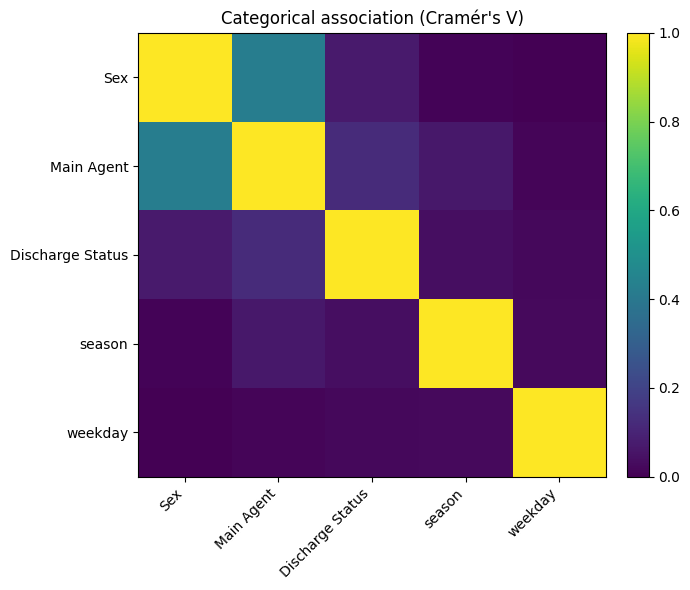

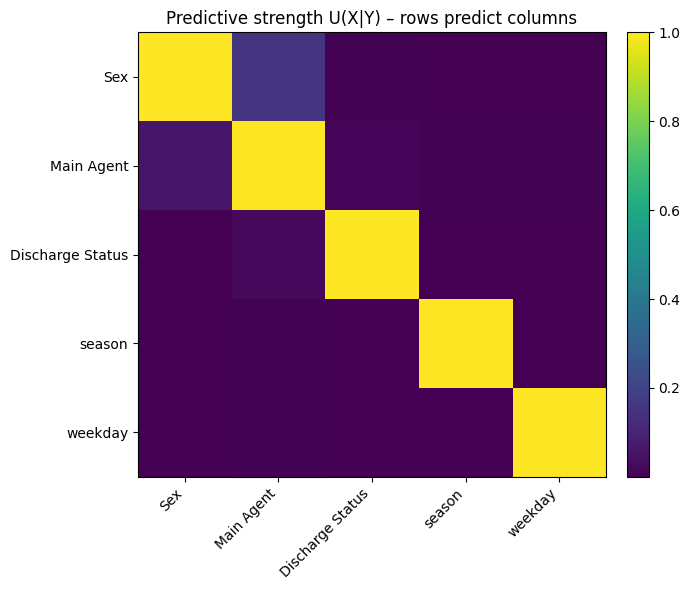

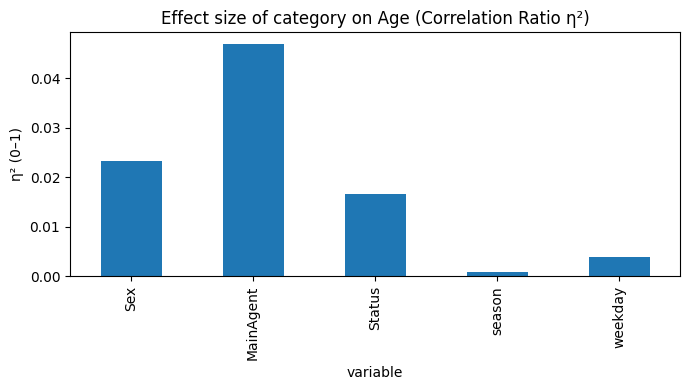

<Figure size 900x450 with 0 Axes>

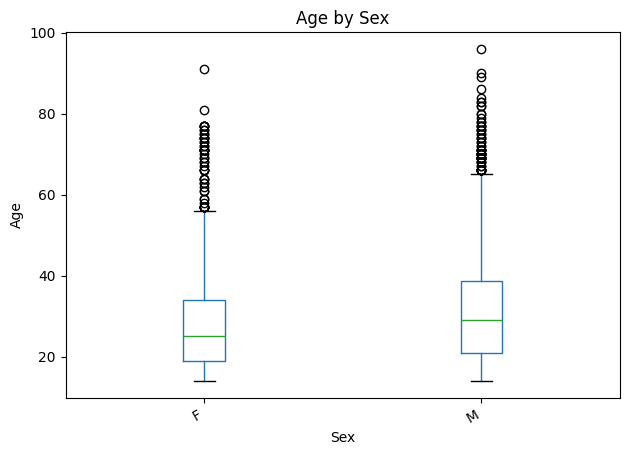

<Figure size 900x450 with 0 Axes>

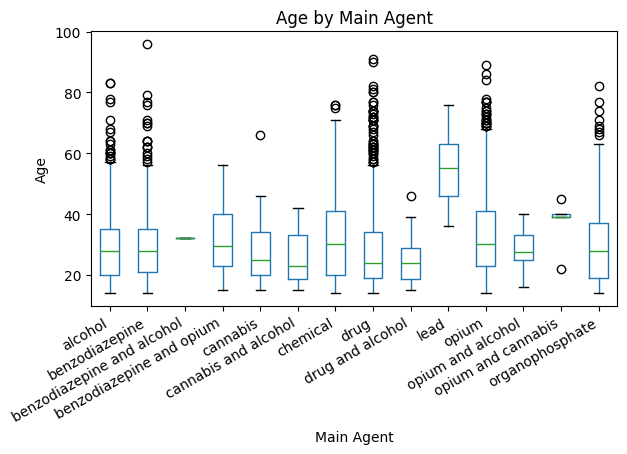

<Figure size 900x450 with 0 Axes>

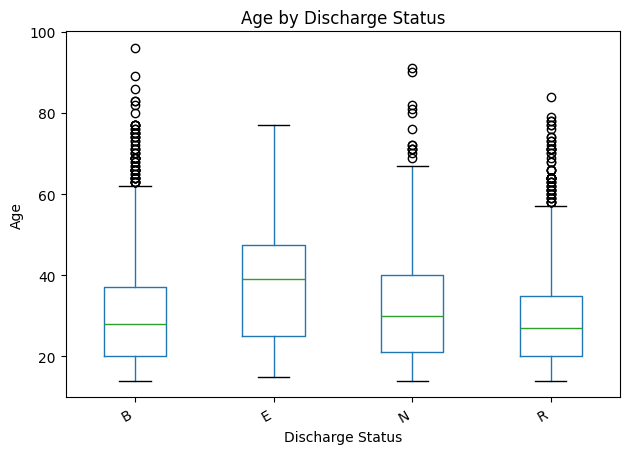

<Figure size 900x450 with 0 Axes>

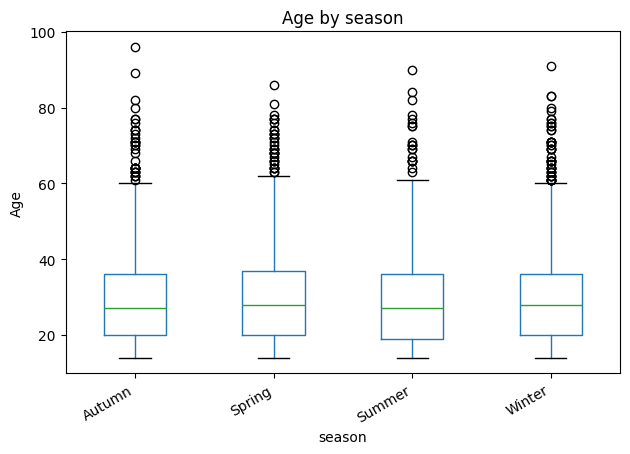

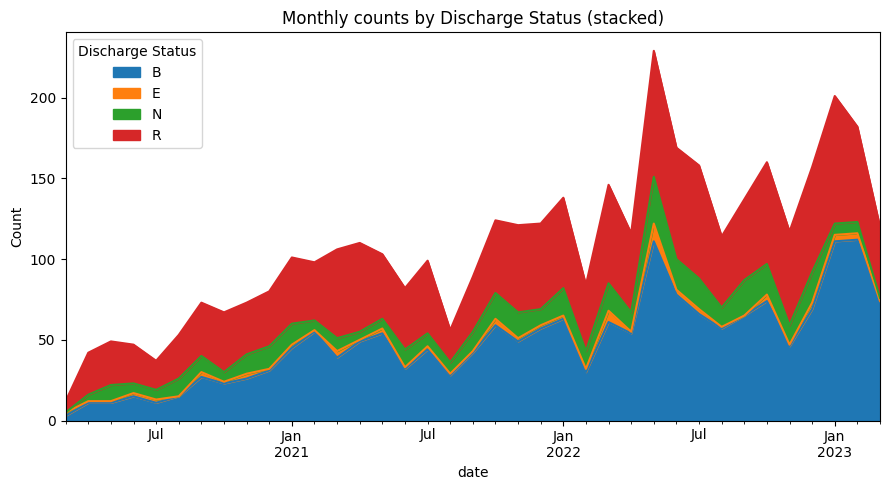

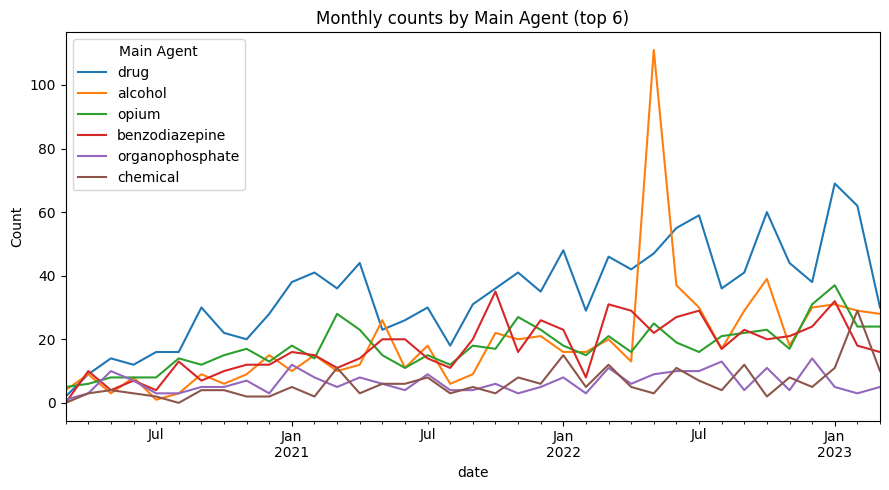

{'Age_by_Sex': {'by': 'Sex',
  'groups_kept': ['F', 'M'],
  'anova': {'F': 94.97908162240945, 'p_value': 3.4054719254734957e-22},
  'kruskal': {'H': 105.5036371752551, 'p_value': 9.472388336293544e-25},
  'eta_squared': 0.0233652079667041},
 'Age_by_MainAgent': {'by': 'Main Agent',
  'groups_kept': ['alcohol',
   'benzodiazepine',
   'benzodiazepine and opium',
   'cannabis',
   'chemical',
   'drug',
   'drug and alcohol',
   'lead',
   'opium',
   'opium and alcohol',
   'organophosphate'],
  'anova': {'F': 19.254951623847443, 'p_value': 4.651129089755395e-35},
  'kruskal': {'H': 147.7126450521081, 'p_value': 1.100987933712256e-26},
  'eta_squared': 0.04694299432296727},
 'Age_by_Status': {'by': 'Discharge Status',
  'groups_kept': ['B', 'E', 'N', 'R'],
  'anova': {'F': 22.494909006930882, 'p_value': 1.9424670016102417e-14},
  'kruskal': {'H': 50.43818052231301, 'p_value': 6.444301908085014e-11},
  'eta_squared': 0.01672283048649113},
 'Age_by_season': {'by': 'season',
  'groups_kept

In [82]:
# poison_connections.py

from __future__ import annotations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from typing import Dict, Optional

# -----------------------------
# Utilities & constants
# -----------------------------
VALID_SEX = {"M", "F"}
VALID_STATUS = {"B", "E", "N", "R"}

SEASON_MAP = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn",
}

def _ensure_dir(path: Optional[str]):
    if path:
        os.makedirs(path, exist_ok=True)

def _prep(df: pd.DataFrame) -> pd.DataFrame:
    """Basic cleaning + date parts."""
    data = df.copy()
    # required columns
    req = ['Age','Sex','Main Agent','Discharge Status','date']
    missing = [c for c in req if c not in data.columns]
    if missing:
        raise ValueError(f"Missing columns: {missing}")

    # types & normalization
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
    data['Sex'] = data['Sex'].astype('string').str.strip().str.upper()
    data['Sex'] = data['Sex'].where(data['Sex'].isin(VALID_SEX), other='other')
    data['Discharge Status'] = data['Discharge Status'].astype('string').str.strip().str.upper()
    data['Discharge Status'] = data['Discharge Status'].where(data['Discharge Status'].isin(VALID_STATUS), other='other')
    data['Main Agent'] = data['Main Agent'].astype('string').str.strip().str.lower()
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data = data[data['date'].notna()].copy()

    # date parts
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['weekday'] = data['date'].dt.day_name()
    data['season'] = data['month'].map(SEASON_MAP)
    return data

def _cramers_v(ct: pd.DataFrame) -> float:
    """Bias-corrected Cramér’s V."""
    if ct.size == 0:
        return np.nan
    chi2 = stats.chi2_contingency(ct)[0]
    n = ct.values.sum()
    phi2 = chi2 / max(n, 1)
    r, k = ct.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/max(n-1,1))
    rcorr = r - ((r-1)**2)/max(n-1,1)
    kcorr = k - ((k-1)**2)/max(n-1,1)
    denom = max(1e-12, min(kcorr-1, rcorr-1))
    return float(np.sqrt(phi2corr / denom)) if denom > 0 else 0.0

def _entropy(p: np.ndarray) -> float:
    p = p[p > 0]
    return float(-(p * np.log2(p)).sum()) if p.size else 0.0

def _theils_u(x: pd.Series, y: pd.Series) -> float:
    """
    Theil’s U (Uncertainty Coefficient) U(X|Y): proportionate reduction in error of X by knowing Y.
    Asymmetric measure in [0,1].
    """
    # contingency table
    ct = pd.crosstab(x, y)
    if ct.empty:
        return np.nan
    pxy = ct.values / ct.values.sum()
    px = pxy.sum(axis=1, keepdims=True)
    py = pxy.sum(axis=0, keepdims=True)

    # H(X), H(X|Y)
    hx = _entropy(px.ravel())
    with np.errstate(divide='ignore', invalid='ignore'):
        cond = np.where(pxy > 0, pxy * (np.log2(py) - np.log2(pxy)), 0.0)
    hxy = float(cond.sum())
    return float((hx - hxy) / hx) if hx > 0 else 0.0

def _eta_squared_num_cat(values: pd.Series, groups: pd.Series) -> float:
    """
    Correlation Ratio (η) for numeric (values) vs categorical (groups): in [0,1]
    η^2 = SSB/SST
    """
    df = pd.DataFrame({'v': pd.to_numeric(values, errors='coerce'), 'g': groups.astype('string')}).dropna()
    if df.empty:
        return np.nan
    overall_mean = df['v'].mean()
    ss_tot = ((df['v'] - overall_mean)**2).sum()
    if ss_tot == 0:
        return 0.0
    ss_between = df.groupby('g')['v'].apply(lambda s: len(s) * (s.mean() - overall_mean)**2).sum()
    return float(ss_between / ss_tot)

# -----------------------------
# Main analyzer
# -----------------------------
def analyze_connections(
    df: pd.DataFrame,
    output_dir: Optional[str] = None,
    show_plots: bool = True,
    frequency: str = "MS"
) -> Dict[str, object]:
    """
    Analyze correlations/associations between dataset fields and plot figures + save tables.
    Returns a dictionary of results (DataFrames and stats).
    """
    _ensure_dir(output_dir)
    data = _prep(df)

    results: Dict[str, object] = {}
    cat_vars = ['Sex', 'Main Agent', 'Discharge Status', 'season', 'weekday']
    # ----------------- Categorical ↔ categorical -----------------
    # Cramér's V matrix
    cv_mat = pd.DataFrame(index=cat_vars, columns=cat_vars, dtype=float)
    for i in cat_vars:
        for j in cat_vars:
            if i == j:
                cv_mat.loc[i, j] = 1.0
            else:
                ct = pd.crosstab(data[i], data[j])
                cv_mat.loc[i, j] = _cramers_v(ct)

    results["cramers_v_matrix"] = cv_mat

    # Theil's U (asymmetric): rows predict columns
    tu_mat = pd.DataFrame(index=cat_vars, columns=cat_vars, dtype=float)
    for i in cat_vars:
        for j in cat_vars:
            if i == j:
                tu_mat.loc[i, j] = 1.0
            else:
                tu_mat.loc[i, j] = _theils_u(data[i], data[j])

    results["theils_u_matrix"] = tu_mat

    # Individual chi-square tests for selected pairs
    pair_tests = {}
    def chi2_pair(a, b):
        t = pd.crosstab(data[a], data[b])
        chi2, p, dof, _ = stats.chi2_contingency(t)
        return {"table": t, "chi2": float(chi2), "p_value": float(p), "dof": int(dof), "cramers_v": _cramers_v(t)}

    pair_tests['Sex_vs_MainAgent'] = chi2_pair('Sex','Main Agent')
    pair_tests['Sex_vs_Status'] = chi2_pair('Sex','Discharge Status')
    pair_tests['MainAgent_vs_Status'] = chi2_pair('Main Agent','Discharge Status')
    pair_tests['Season_vs_MainAgent'] = chi2_pair('season','Main Agent')
    pair_tests['Season_vs_Status'] = chi2_pair('season','Discharge Status')
    pair_tests['Weekday_vs_Status'] = chi2_pair('weekday','Discharge Status')
    results["chi2_tests"] = pair_tests

    # ----------------- Numeric (Age) ↔ categorical -----------------
    def age_tests(by: str, min_group=10):
        g = [(k, v['Age'].dropna().values) for k, v in data.groupby(by)]
        kept = [(k, a) for (k, a) in g if len(a) >= min_group]
        out = {"by": by, "groups_kept": [k for (k, _) in kept]}
        if len(kept) >= 2:
            arrays = [a for (_, a) in kept]
            f, p_anova = stats.f_oneway(*arrays)
            h, p_kw = stats.kruskal(*arrays)
            out["anova"] = {"F": float(f), "p_value": float(p_anova)}
            out["kruskal"] = {"H": float(h), "p_value": float(p_kw)}
        else:
            out["note"] = f"Not enough groups (>= {min_group}) with data."
        out["eta_squared"] = _eta_squared_num_cat(data['Age'], data[by])
        return out

    age_assoc = {
        'Age_by_Sex': age_tests('Sex'),
        'Age_by_MainAgent': age_tests('Main Agent'),
        'Age_by_Status': age_tests('Discharge Status'),
        'Age_by_season': age_tests('season'),
        'Age_by_weekday': age_tests('weekday'),
    }
    results["age_associations"] = age_assoc

    # ----------------- Time connections -----------------
    ts = data.set_index('date').sort_index()
    monthly_total = ts['Age'].resample(frequency).size().rename('count').to_frame()
    monthly_by_status = ts.groupby('Discharge Status')['Age'].resample(frequency).size().unstack(0).fillna(0)
    monthly_by_agent = ts.groupby('Main Agent')['Age'].resample(frequency).size().unstack(0).fillna(0)

    results["monthly_total"] = monthly_total
    results["monthly_by_status"] = monthly_by_status
    results["monthly_by_agent"] = monthly_by_agent

    # ----------------- Plots -----------------
    if show_plots:
        # Cramér's V heatmap
        fig = plt.figure(figsize=(7,6))
        im = plt.imshow(cv_mat.values.astype(float), aspect='auto')
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks(range(len(cv_mat.columns)), cv_mat.columns, rotation=45, ha='right')
        plt.yticks(range(len(cv_mat.index)), cv_mat.index)
        plt.title("Categorical association (Cramér's V)")
        plt.tight_layout()
        if output_dir: fig.savefig(os.path.join(output_dir, "cramers_v_heatmap.png"), dpi=150)
        plt.show()

        # Theil's U heatmap (asymmetric)
        fig = plt.figure(figsize=(7,6))
        im = plt.imshow(tu_mat.values.astype(float), aspect='auto')
        plt.colorbar(im, fraction=0.046, pad=0.04)
        plt.xticks(range(len(tu_mat.columns)), tu_mat.columns, rotation=45, ha='right')
        plt.yticks(range(len(tu_mat.index)), tu_mat.index)
        plt.title("Predictive strength U(X|Y) – rows predict columns")
        plt.tight_layout()
        if output_dir: fig.savefig(os.path.join(output_dir, "theils_u_heatmap.png"), dpi=150)
        plt.show()

        # Age vs categorical: η effect sizes bar
        eta_df = pd.DataFrame({
            "variable": [k.replace("Age_by_","") for k in age_assoc.keys()],
            "eta_squared": [age_assoc[k]["eta_squared"] for k in age_assoc.keys()]
        }).set_index("variable")
        fig = plt.figure(figsize=(7,4))
        eta_df['eta_squared'].plot(kind='bar')
        plt.title("Effect size of category on Age (Correlation Ratio η²)")
        plt.ylabel("η² (0–1)")
        plt.tight_layout()
        if output_dir: fig.savefig(os.path.join(output_dir, "age_eta_squared.png"), dpi=150)
        plt.show()

        # Boxplots for Age by selected categories
        for col in ['Sex','Main Agent','Discharge Status','season']:
            fig = plt.figure(figsize=(9,4.5))
            data[['Age', col]].dropna().boxplot(by=col, column='Age', grid=False, vert=True)
            plt.suptitle("")
            plt.title(f"Age by {col}")
            plt.ylabel("Age")
            plt.xticks(rotation=30, ha='right')
            plt.tight_layout()
            if output_dir: fig.savefig(os.path.join(output_dir, f"age_by_{col.replace(' ','_').lower()}_box.png"), dpi=150)
            plt.show()

        # Stacked monthly counts by Discharge Status (trend of composition)
        if not monthly_by_status.empty:
            fig = plt.figure(figsize=(9,5))
            monthly_by_status.plot(kind='area', stacked=True, ax=plt.gca())
            plt.title("Monthly counts by Discharge Status (stacked)")
            plt.ylabel("Count")
            plt.tight_layout()
            if output_dir: fig.savefig(os.path.join(output_dir, "monthly_by_status_stacked.png"), dpi=150)
            plt.show()

        # Top agents monthly lines
        if not monthly_by_agent.empty:
            top_agents = monthly_by_agent.sum().sort_values(ascending=False).head(6).index
            fig = plt.figure(figsize=(9,5))
            monthly_by_agent[top_agents].plot(ax=plt.gca())
            plt.title("Monthly counts by Main Agent (top 6)")
            plt.ylabel("Count")
            plt.tight_layout()
            if output_dir: fig.savefig(os.path.join(output_dir, "monthly_by_agent_top6.png"), dpi=150)
            plt.show()

    # ----------------- Save tables -----------------
    if output_dir:
        cv_mat.to_csv(os.path.join(output_dir, "cramers_v_matrix.csv"))
        tu_mat.to_csv(os.path.join(output_dir, "theils_u_matrix.csv"))
        # chi-square stats
        rows = []
        for name, res in pair_tests.items():
            rows.append({
                "pair": name,
                "chi2": res["chi2"],
                "p_value": res["p_value"],
                "dof": res["dof"],
                "cramers_v": res["cramers_v"]
            })
            res["table"].to_csv(os.path.join(output_dir, f"{name}_crosstab.csv"))
        pd.DataFrame(rows).to_csv(os.path.join(output_dir, "chi2_summary.csv"), index=False)

        # age associations
        age_rows = []
        for name, res in age_assoc.items():
            row = {"name": name, "eta_squared": res.get("eta_squared", np.nan)}
            if res.get("anova"):
                row.update({"anova_F": res["anova"]["F"], "anova_p": res["anova"]["p_value"]})
            if res.get("kruskal"):
                row.update({"kruskal_H": res["kruskal"]["H"], "kruskal_p": res["kruskal"]["p_value"]})
            row["groups_kept"] = ";".join(res.get("groups_kept", []))
            age_rows.append(row)
        pd.DataFrame(age_rows).to_csv(os.path.join(output_dir, "age_associations_summary.csv"), index=False)

        monthly_total.to_csv(os.path.join(output_dir, "monthly_total_counts.csv"))
        monthly_by_status.to_csv(os.path.join(output_dir, "monthly_by_status_counts.csv"))
        monthly_by_agent.to_csv(os.path.join(output_dir, "monthly_by_agent_counts.csv"))

    return results


# -----------------------------
# Example usage (commented)
# -----------------------------
import pandas as pd
out = analyze_connections(df, output_dir="connections_report", show_plots=True)
out["cramers_v_matrix"]       # heatmap-ready matrix
out["theils_u_matrix"]        # asymmetric predictive strengths
out["age_associations"]       # ANOVA/Kruskal/η² per category

========== MODEL PERFORMANCE ==========
Accuracy : 0.503
Precision: 0.252
Recall   : 0.289
F1-score : 0.269

Classification Report:

              precision    recall  f1-score   support

           B      0.522     0.535     0.528       359
           E      0.000     0.000     0.000        18
           N      0.000     0.000     0.000        84
           R      0.487     0.623     0.547       334

    accuracy                          0.503       795
   macro avg      0.252     0.289     0.269       795
weighted avg      0.440     0.503     0.468       795



/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/metrics

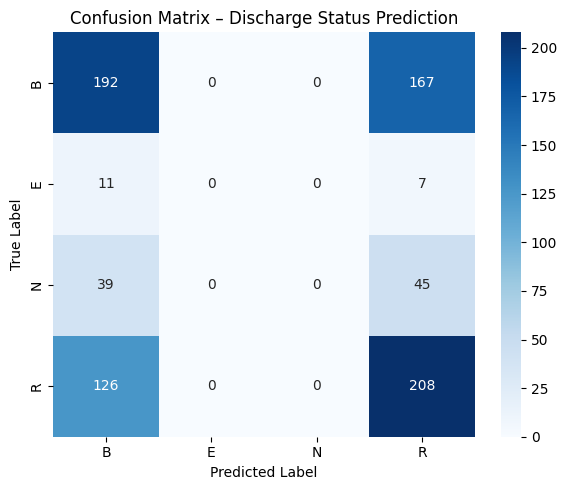

In [83]:
# poison_discharge_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# ----------------------------
# Function: train regression model
# ----------------------------
def predict_discharge_status(df: pd.DataFrame):
    """
    Train and evaluate a regression model (Logistic Regression)
    to predict Discharge Status based on Age, Sex, and Main Agent.
    """
    # --- 1. Basic cleaning ---
    required = ['Age', 'Sex', 'Main Agent', 'Discharge Status']
    for col in required:
        if col not in df.columns:
            raise ValueError(f"Missing column: {col}")

    data = df.copy()
    data = data[required].dropna()

    # Keep only reasonable categories
    data['Sex'] = data['Sex'].astype(str).str.strip().str.upper()
    data['Main Agent'] = data['Main Agent'].astype(str).str.strip().str.lower()
    data['Discharge Status'] = data['Discharge Status'].astype(str).str.strip().str.upper()

    # --- 2. Features and target ---
    X = data[['Age', 'Sex', 'Main Agent']]
    y = data['Discharge Status']

    # --- 3. Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- 4. Preprocessing (One-hot encoding for categorical vars) ---
    numeric_features = ['Age']
    categorical_features = ['Sex', 'Main Agent']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

    # --- 5. Logistic Regression model ---
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=200, multi_class='auto', solver='lbfgs'))
    ])

    # --- 6. Train the model ---
    model.fit(X_train, y_train)

    # --- 7. Predictions ---
    y_pred = model.predict(X_test)

    # --- 8. Evaluation metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print("========== MODEL PERFORMANCE ==========")
    print(f"Accuracy : {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall   : {recall:.3f}")
    print(f"F1-score : {f1:.3f}")
    print("=======================================")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, digits=3))

    # --- 9. Confusion Matrix Visualization ---
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix – Discharge Status Prediction")
    plt.tight_layout()
    plt.show()

    return {
        "model": model,
        "X_test": X_test,
        "y_test": y_test,
        "y_pred": y_pred,
        "metrics": {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1
        },
        "confusion_matrix": cm
    }


# ----------------------------
# Example Usage
# ----------------------------


    # Suppose df already loaded:
results = predict_discharge_status(df)


In [99]:

df['Discharge Status'].value_counts()


Discharge Status
B    1796
R    1667
N     421
E      88
Name: count, dtype: int64

In [85]:
print("""In this experiment, a predictive modeling approach was employed to estimate a patient’s discharge status based on three key variables: age, sex, and main agent of poisoning. The primary objective was to evaluate whether demographic and toxicological factors could predict clinical outcomes such as recovery, death, referral, or self-discharge. The dataset was first cleaned and preprocessed by converting categorical fields into machine-readable format through one-hot encoding, and missing or inconsistent values were removed. The processed data was then divided into two subsets: 80% for training and 20% for testing, ensuring that the model could generalize beyond the training data. A logistic regression model was chosen for this task because it is well-suited for multi-class classification and provides interpretable results regarding the effect of each feature on the probability of each discharge outcome.

After training, the model was evaluated using standard performance metrics, including accuracy, precision, recall, and F1-score. The confusion matrix was also plotted to visualize the correct and incorrect classifications across all categories. These metrics collectively provided a clear picture of the model’s ability to distinguish between different patient outcomes. For instance, high accuracy and recall would indicate that the model can reliably predict patient recovery or mortality based on initial factors, while lower precision in certain classes might suggest overlapping patterns between discharge categories. Overall, this experiment demonstrated how regression-based machine learning methods can be effectively applied to clinical data to uncover meaningful predictive patterns and assist in decision-making for patient management.""")

In this experiment, a predictive modeling approach was employed to estimate a patient’s discharge status based on three key variables: age, sex, and main agent of poisoning. The primary objective was to evaluate whether demographic and toxicological factors could predict clinical outcomes such as recovery, death, referral, or self-discharge. The dataset was first cleaned and preprocessed by converting categorical fields into machine-readable format through one-hot encoding, and missing or inconsistent values were removed. The processed data was then divided into two subsets: 80% for training and 20% for testing, ensuring that the model could generalize beyond the training data. A logistic regression model was chosen for this task because it is well-suited for multi-class classification and provides interpretable results regarding the effect of each feature on the probability of each discharge outcome.

After training, the model was evaluated using standard performance metrics, includin

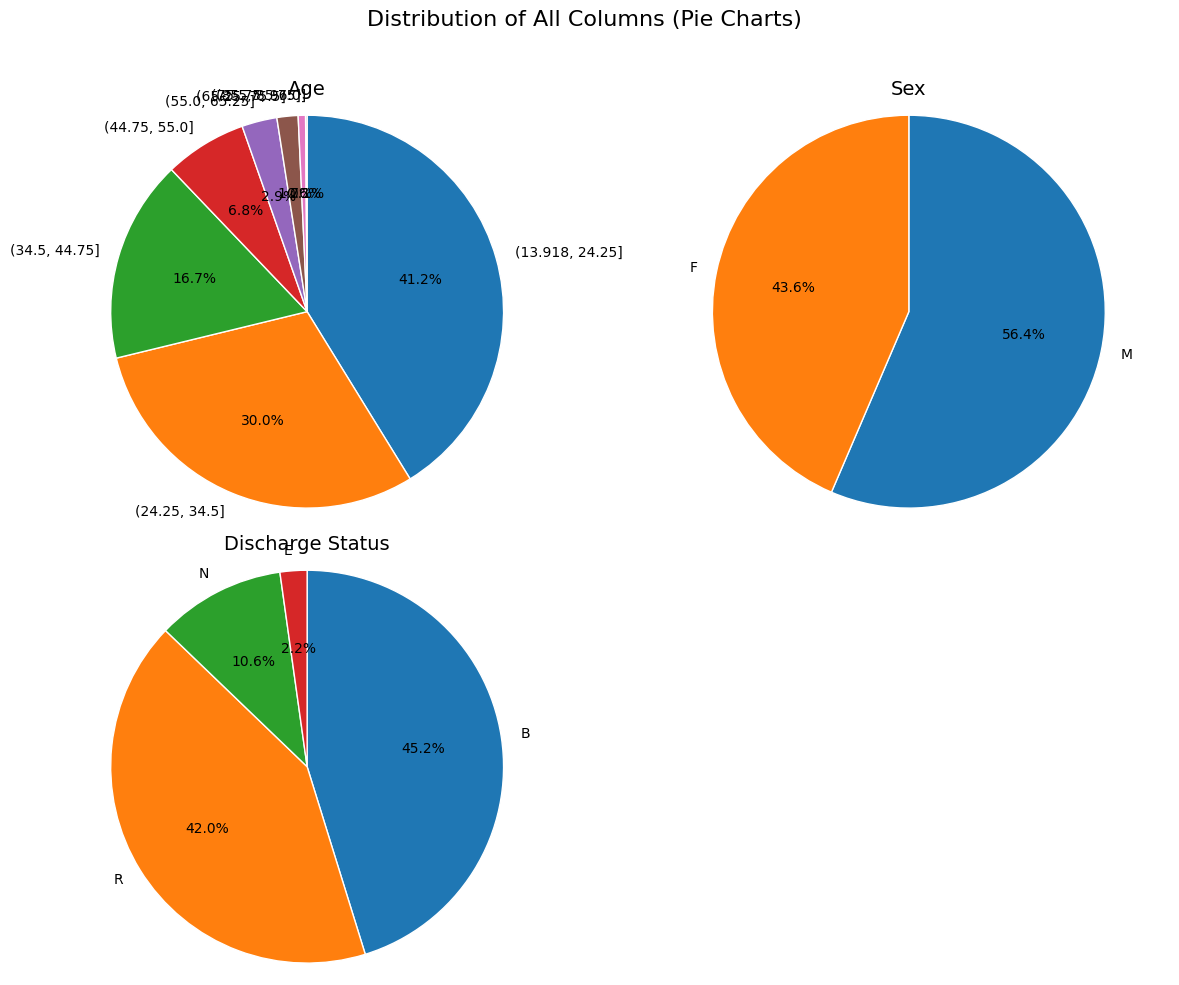

In [103]:
# pie_distribution_plots.py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_pie_distributions(df: pd.DataFrame, bins_for_numeric: int = 8, max_categories: int = 15):
    """
    Plot pie charts for the distribution of all columns in a pandas DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe containing categorical and/or numeric columns.
    bins_for_numeric : int
        Number of bins to use for numeric columns.
    max_categories : int
        Maximum number of categories to show in the pie chart (others are grouped as 'Other').
    """
    n_cols = df.shape[1]
    n_rows = math.ceil(n_cols / 2)

    plt.figure(figsize=(12, 5 * n_rows))
    plt.suptitle("Distribution of All Columns (Pie Charts)", fontsize=16, y=0.98)

    for idx, col in enumerate(df.columns, start=1):
        s = df[col].dropna()
        
        # Handle numeric and categorical differently
        if pd.api.types.is_numeric_dtype(s):
            # Bin numeric values
            s = pd.cut(s, bins=bins_for_numeric)
            counts = s.value_counts().sort_index()
        else:
            # Convert to string and count categories
            s = s.astype(str).str.strip()
            counts = s.value_counts()
            if len(counts) > max_categories:
                counts_other = counts[max_categories:].sum()
                counts = counts[:max_categories]
                counts.loc["Other"] = counts_other

        # Prepare subplot
        plt.subplot(n_rows, 2, idx)
        plt.pie(
            counts.values,
            labels=counts.index,
            autopct="%1.1f%%",
            startangle=90,
            counterclock=False,
            wedgeprops={"edgecolor": "white"},
        )
        plt.title(col, fontsize=14)
        plt.axis("equal")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ------------------------
# Example Usage
# ------------------------

plot_pie_distributions(df[['Age', 'Sex', 'Discharge Status']])


==== (1) FEATURE IMPORTANCE (Random Forest) ====
                                  Feature  Importance
0                                     Age    0.830877
6     Main Agent_benzodiazepine and opium    0.021042
9                     Main Agent_chemical    0.018600
7                     Main Agent_cannabis    0.018161
3                      Main Agent_alcohol    0.016229
13                       Main Agent_opium    0.015807
10                        Main Agent_drug    0.013027
1                                   Sex_F    0.011934
2                                   Sex_M    0.010984
4               Main Agent_benzodiazepine    0.010783
16             Main Agent_organophosphate    0.010088
11            Main Agent_drug and alcohol    0.006447
12                        Main Agent_lead    0.004651
14           Main Agent_opium and alcohol    0.003870
8         Main Agent_cannabis and alcohol    0.003306
15          Main Agent_opium and cannabis    0.002642
5   Main Agent_benzodiazepine an

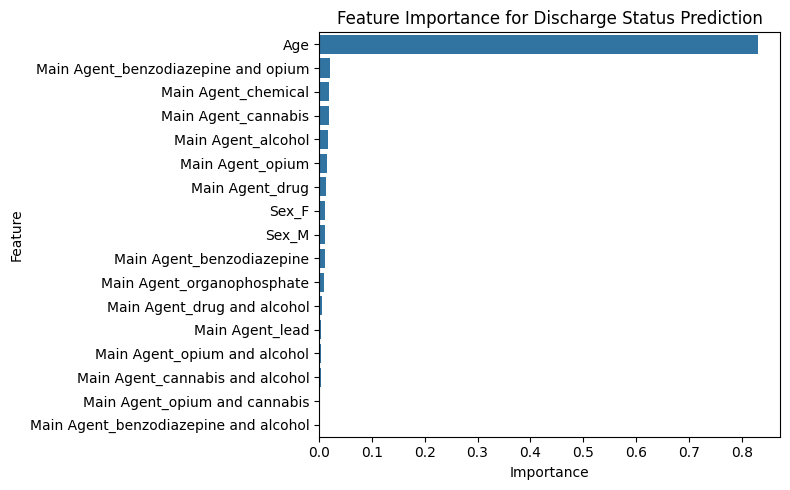


==== (2) K-MEANS CLUSTERING ====
Silhouette Score: 0.297

Cluster summary:
               Age                 Sex      Main Agent
              mean        std <lambda>        <lambda>
Cluster                                               
0        24.626168   8.101407        F            drug
1        26.235161   7.249129        M         alcohol
2        53.431341  10.782630        M           opium
3        25.743713   7.813868        F  benzodiazepine


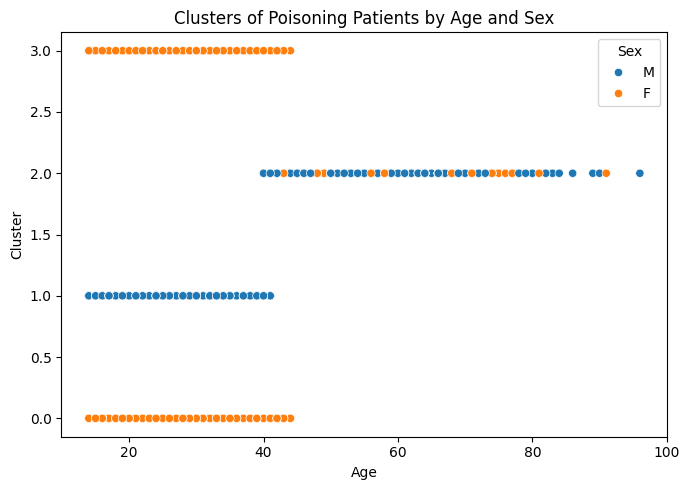


==== (3) PCA VISUALIZATION ====
Explained variance ratio: [0.44883992 0.22730048]


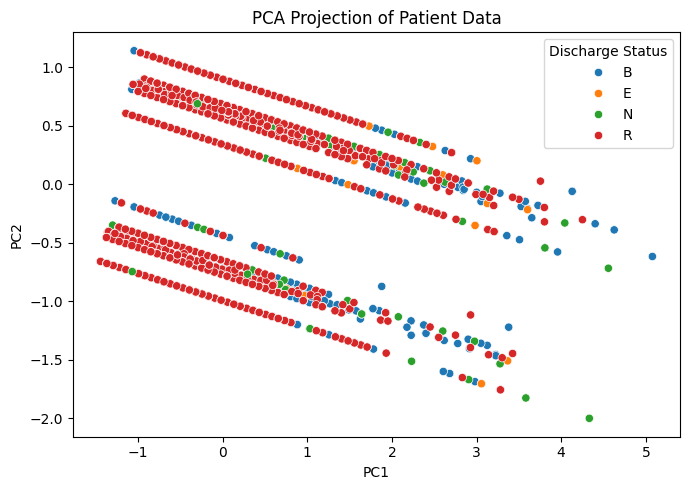


==== (4) OUTLIER DETECTION ====
IQR method found 125 outliers (Age < -5.5 or > 62.5).
Isolation Forest found 198 outliers.


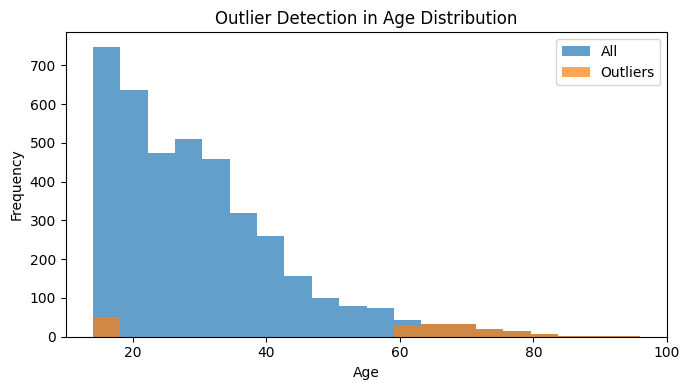

Prophet not installed. Skipping forecasting experiment.

==== (6) CHI-SQUARE RESIDUAL HEATMAP ====
Chi-square: 218.72, p-value: 0.00000, dof: 39


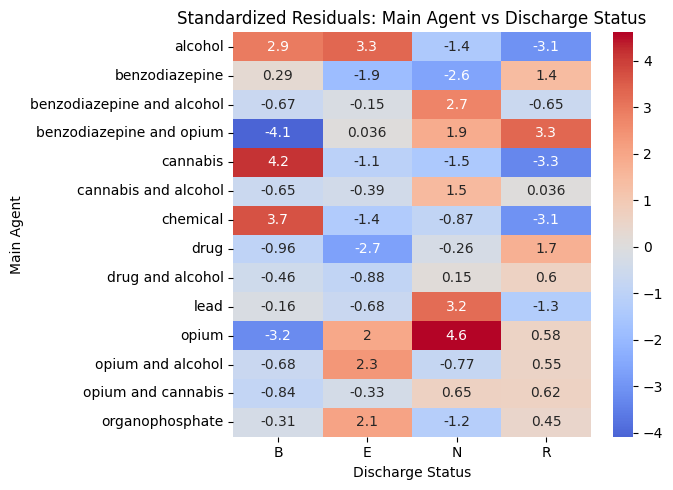

In [104]:
# poison_additional_experiments.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy import stats

# optional: Prophet for forecasting (install with pip install prophet)
try:
    from prophet import Prophet
    HAS_PROPHET = True
except ImportError:
    HAS_PROPHET = False


# ============================================================
# 1. Feature Importance using Random Forest
# ============================================================
def experiment_feature_importance(df):
    """
    Identify which features (Age, Sex, Main Agent) are most important 
    for predicting Discharge Status.
    """
    print("\n==== (1) FEATURE IMPORTANCE (Random Forest) ====")
    data = df.dropna(subset=['Age', 'Sex', 'Main Agent', 'Discharge Status']).copy()

    X = data[['Age', 'Sex', 'Main Agent']]
    y = data['Discharge Status'].astype(str)

    preprocessor = ColumnTransformer([
        ('num', 'passthrough', ['Age']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Main Agent'])
    ])

    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    model = Pipeline([('pre', preprocessor), ('rf', rf)])
    model.fit(X, y)

    # Extract feature names
    ohe = model.named_steps['pre'].named_transformers_['cat']
    cat_names = ohe.get_feature_names_out(['Sex', 'Main Agent'])
    feat_names = np.concatenate([['Age'], cat_names])
    importances = model.named_steps['rf'].feature_importances_

    imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print(imp_df)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=imp_df)
    plt.title("Feature Importance for Discharge Status Prediction")
    plt.tight_layout()
    plt.show()

    return imp_df


# ============================================================
# 2. K-Means Clustering to find patient subgroups
# ============================================================
def experiment_clustering(df, n_clusters=4):
    """
    Perform clustering based on Age and poisoning agent features.
    """
    print("\n==== (2) K-MEANS CLUSTERING ====")
    data = df.dropna(subset=['Age', 'Sex', 'Main Agent']).copy()

    X = data[['Age', 'Sex', 'Main Agent']]
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), ['Age']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Main Agent'])
    ])
    X_scaled = preprocessor.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    data['Cluster'] = labels

    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")

    cluster_summary = data.groupby('Cluster').agg({
        'Age': ['mean', 'std'],
        'Sex': lambda s: s.value_counts().index[0],
        'Main Agent': lambda s: s.value_counts().index[0]
    })
    print("\nCluster summary:")
    print(cluster_summary)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x='Age', y='Cluster', hue='Sex', data=data, palette='tab10')
    plt.title("Clusters of Poisoning Patients by Age and Sex")
    plt.tight_layout()
    plt.show()

    return data, cluster_summary


# ============================================================
# 3. Principal Component Analysis (PCA)
# ============================================================
def experiment_pca(df):
    """
    Reduce the dataset to 2D using PCA for visualization.
    """
    print("\n==== (3) PCA VISUALIZATION ====")
    data = df.dropna(subset=['Age', 'Sex', 'Main Agent']).copy()

    X = data[['Age', 'Sex', 'Main Agent']]
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), ['Age']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Main Agent'])
    ])
    X_scaled = preprocessor.fit_transform(X)

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['Discharge Status'] = df['Discharge Status'].values

    print("Explained variance ratio:", pca.explained_variance_ratio_)

    plt.figure(figsize=(7, 5))
    sns.scatterplot(x='PC1', y='PC2', hue='Discharge Status', data=df_pca, palette='tab10')
    plt.title("PCA Projection of Patient Data")
    plt.tight_layout()
    plt.show()

    return df_pca


# ============================================================
# 4. Outlier Detection
# ============================================================
def experiment_outliers(df):
    """
    Detect unusual patients using both IQR and IsolationForest.
    """
    print("\n==== (4) OUTLIER DETECTION ====")
    data = df.dropna(subset=['Age']).copy()
    ages = data['Age']

    # IQR-based outliers
    q1, q3 = ages.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    iqr_outliers = data[(ages < lower) | (ages > upper)]
    print(f"IQR method found {len(iqr_outliers)} outliers (Age < {lower:.1f} or > {upper:.1f}).")

    # Isolation Forest
    iso = IsolationForest(contamination=0.05, random_state=42)
    data['Outlier_Score'] = iso.fit_predict(ages.values.reshape(-1, 1))
    iso_outliers = data[data['Outlier_Score'] == -1]
    print(f"Isolation Forest found {len(iso_outliers)} outliers.")

    plt.figure(figsize=(7, 4))
    plt.hist(ages, bins=20, alpha=0.7, label='All')
    plt.hist(iso_outliers['Age'], bins=20, alpha=0.7, label='Outliers')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Outlier Detection in Age Distribution")
    plt.tight_layout()
    plt.show()

    return iqr_outliers, iso_outliers


# ============================================================
# 5. Time-Series Forecasting (Prophet)
# ============================================================
def experiment_forecasting(df):
    """
    Forecast the number of poisoning cases using Facebook Prophet.
    """
    if not HAS_PROPHET:
        print("Prophet not installed. Skipping forecasting experiment.")
        return None

    print("\n==== (5) TIME SERIES FORECASTING (PROPHET) ====")
    data = df.dropna(subset=['date']).copy()
    ts = data.groupby(pd.Grouper(key='date', freq='M')).size().reset_index(name='count')
    ts = ts.rename(columns={'date': 'ds', 'count': 'y'})

    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(ts)

    future = m.make_future_dataframe(periods=6, freq='M')
    forecast = m.predict(future)

    m.plot(forecast)
    plt.title("Forecast of Monthly Poisoning Cases (Prophet)")
    plt.show()

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


# ============================================================
# 6. Chi-Square Residual Visualization
# ============================================================
def experiment_chi_square_heatmap(df, col1='Main Agent', col2='Discharge Status'):
    """
    Compute chi-square residuals and visualize them in a heatmap.
    """
    print("\n==== (6) CHI-SQUARE RESIDUAL HEATMAP ====")
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    residuals = (table - expected) / np.sqrt(expected)

    print(f"Chi-square: {chi2:.2f}, p-value: {p:.5f}, dof: {dof}")
    plt.figure(figsize=(7, 5))
    sns.heatmap(residuals, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Standardized Residuals: {col1} vs {col2}")
    plt.tight_layout()
    plt.show()

    return residuals


# ============================================================
# Example combined run
# ============================================================

    # Example: load your dataset
    # df = pd.read_csv("poisonings.csv", parse_dates=['date'])

    # Run all experiments
fi = experiment_feature_importance(df)
clus, clus_summary = experiment_clustering(df)
pca_data = experiment_pca(df)
iqr_out, iso_out = experiment_outliers(df)
forecast = experiment_forecasting(df)
chi_res = experiment_chi_square_heatmap(df)


In [105]:
print("""
ummary of New Experiments
	1.	Feature Importance (Random Forest)
Identifies which features (e.g., Age, Sex, Main Agent) contribute most to predicting Discharge Status.
→ Output: Bar chart of feature importances.
	2.	K-Means Clustering
Groups patients into clusters with similar poisoning profiles.
→ Output: Cluster summary and scatter plot.
	3.	PCA Visualization
Reduces multidimensional poisoning features into two components for visual interpretation of patterns.
→ Output: PCA scatter plot colored by discharge outcomes.
	4.	Outlier Detection
Detects unusual patient records based on age or data pattern using IQR and Isolation Forest.
→ Output: Histograms highlighting outlier patients.
	5.	Time-Series Forecasting (Prophet)
Predicts the future number of poisoning cases per month.
→ Output: Forecast curve with confidence intervals.
	6.	Chi-Square Residual Heatmap
Reveals which combinations of categorical variables deviate most from independence.
→ Output: Annotated heatmap of standardized residuals.
      """)


ummary of New Experiments
	1.	Feature Importance (Random Forest)
Identifies which features (e.g., Age, Sex, Main Agent) contribute most to predicting Discharge Status.
→ Output: Bar chart of feature importances.
	2.	K-Means Clustering
Groups patients into clusters with similar poisoning profiles.
→ Output: Cluster summary and scatter plot.
	3.	PCA Visualization
Reduces multidimensional poisoning features into two components for visual interpretation of patterns.
→ Output: PCA scatter plot colored by discharge outcomes.
	4.	Outlier Detection
Detects unusual patient records based on age or data pattern using IQR and Isolation Forest.
→ Output: Histograms highlighting outlier patients.
	5.	Time-Series Forecasting (Prophet)
Predicts the future number of poisoning cases per month.
→ Output: Forecast curve with confidence intervals.
	6.	Chi-Square Residual Heatmap
Reveals which combinations of categorical variables deviate most from independence.
→ Output: Annotated heatmap of standardized 

In [106]:
print(""" 1. Feature Importance (Random Forest Analysis)

This experiment aimed to determine which patient features — namely Age, Sex, and Main Agent — had the greatest influence on predicting the Discharge Status of poisoning cases. To achieve this, a Random Forest Classifier was trained on the dataset after applying one-hot encoding to categorical variables and scaling numerical ones. Random Forest is an ensemble learning algorithm that builds multiple decision trees and averages their results to improve prediction accuracy and reduce overfitting. By measuring how much each feature reduces impurity across all trees, the model assigns an “importance score” to each predictor, reflecting its relative contribution to the outcome.

The resulting importance values were visualized as a bar chart, revealing the features with the strongest association with discharge outcomes such as recovery, death, or referral. A high feature importance score indicates that the variable provides substantial information for class separation, while a low score suggests limited predictive relevance. For instance, Main Agent may emerge as the most significant factor if certain poisons (like opium or organophosphates) are consistently associated with severe outcomes. This analysis not only provides interpretability to predictive models but also helps clinicians and policymakers prioritize the most influential patient or toxicological factors in prognosis estimation.

⸻

2. K-Means Clustering (Patient Grouping)

The goal of this experiment was to uncover hidden subgroups of patients with similar characteristics using K-Means Clustering, an unsupervised machine learning algorithm. The model utilized Age, Sex, and Main Agent as input features, which were normalized and one-hot encoded to ensure comparability. The algorithm then grouped patients into clusters based on their proximity in multidimensional feature space, minimizing within-cluster variance. The optimal number of clusters was determined empirically, and the silhouette score was calculated to evaluate how distinct each group was.

Interpreting these clusters allows us to identify meaningful clinical or demographic groupings. For example, one cluster might represent young female patients poisoned primarily by medications, while another could consist of older males with opium-related intoxications. Such insights can support targeted public health interventions, improve hospital resource allocation, and even help identify behavioral patterns leading to recurrent poisonings. This unsupervised approach enables the discovery of natural structures in the data without requiring prior labeling, providing a data-driven way to understand the diversity of poisoning cases.

⸻

3. Principal Component Analysis (PCA Visualization)

The Principal Component Analysis (PCA) experiment was designed to reduce the multidimensional poisoning dataset into a smaller number of uncorrelated components, thereby simplifying visualization and identifying underlying patterns. PCA transforms correlated features into a new coordinate system where each principal component (PC) explains a portion of the dataset’s variance. By projecting the data into two dimensions (PC1 and PC2), the experiment allows us to visually assess whether patient groups with similar discharge outcomes or poisoning agents cluster naturally in lower-dimensional space.

This visualization is particularly valuable for exploratory data analysis. It helps to identify whether certain poisoning types or demographic profiles form distinct clusters or overlap substantially, indicating complex relationships. For instance, if the recovered and expired cases form separate groups in PCA space, it suggests that their underlying features (such as toxin type and age) differ systematically. Conversely, if the points overlap, it might imply that discharge status cannot be easily distinguished from basic demographic or toxicological variables alone, highlighting the need for more detailed clinical parameters in predictive modeling.

⸻

4. Outlier Detection (IQR and Isolation Forest)

This experiment focused on identifying unusual or extreme patient records that deviate significantly from the general population using both statistical and machine learning–based methods. First, the Interquartile Range (IQR) method was used to detect outliers in the Age distribution, marking patients whose ages fall far below or above the typical range. Next, an Isolation Forest algorithm was employed to detect multivariate anomalies, learning patterns that distinguish normal observations from rare, potentially atypical cases. Isolation Forest is particularly effective in high-dimensional data because it isolates anomalies by randomly partitioning the feature space.

Identifying outliers is crucial for two reasons. From a data perspective, it helps detect possible data-entry errors or rare events that might bias statistical analysis. From a medical standpoint, outliers may correspond to highly unusual poisoning cases—such as extremely young or old patients exposed to uncommon toxins—that warrant further investigation. Visualizing these outliers against the overall distribution can guide clinical researchers in determining whether they represent meaningful cases (e.g., high-risk groups) or spurious data points that should be excluded from modeling.

⸻

5. Time-Series Forecasting (Prophet Model)

The purpose of this experiment was to model and forecast the temporal trend of poisoning cases using Facebook’s Prophet algorithm. Monthly case counts were aggregated from the dataset’s date column and input into the model to capture both trend and seasonality components. Prophet decomposes the time series into trend, seasonality, and residual elements, allowing it to detect patterns such as yearly cycles or increasing trends in specific types of poisonings. The model then generated predictions for future months along with confidence intervals, offering an intuitive representation of uncertainty.

This forecasting experiment has practical implications for hospital management and public health planning. By predicting potential peaks or troughs in poisoning cases, health authorities can optimize resource allocation, staffing, and antidote availability. For instance, if the model detects an annual increase in cases during summer months due to pesticide exposure, preventive interventions can be scheduled accordingly. This predictive capability transforms historical epidemiological data into actionable insights, contributing to early-warning systems for poisoning surveillance.

⸻

6. Chi-Square Residual Heatmap (Association Visualization)

The Chi-Square Residual Analysis was conducted to explore the dependency structure between categorical variables—specifically between Main Agent and Discharge Status. After constructing a contingency table, the Chi-square test of independence was applied to assess whether the two variables were statistically related. Beyond the overall test statistic, the standardized residuals were computed for each cell, indicating how much the observed frequency differed from the expected value under independence. These residuals were visualized as a heatmap, where positive values represent combinations occurring more often than expected, and negative values represent less frequent combinations.

This visualization offers a more nuanced understanding of associations that the Chi-square test alone cannot reveal. For example, a strong positive residual for “organophosphate–expired” would imply that organophosphate poisoning is significantly overrepresented among fatal cases. Similarly, negative residuals could indicate combinations that are relatively rare, such as “benzodiazepine–referred.” By combining statistical testing with visual analytics, this experiment identifies specific agent–outcome relationships that merit closer clinical attention, guiding both treatment protocols and preventive strategies.
""")

 1. Feature Importance (Random Forest Analysis)

This experiment aimed to determine which patient features — namely Age, Sex, and Main Agent — had the greatest influence on predicting the Discharge Status of poisoning cases. To achieve this, a Random Forest Classifier was trained on the dataset after applying one-hot encoding to categorical variables and scaling numerical ones. Random Forest is an ensemble learning algorithm that builds multiple decision trees and averages their results to improve prediction accuracy and reduce overfitting. By measuring how much each feature reduces impurity across all trees, the model assigns an “importance score” to each predictor, reflecting its relative contribution to the outcome.

The resulting importance values were visualized as a bar chart, revealing the features with the strongest association with discharge outcomes such as recovery, death, or referral. A high feature importance score indicates that the variable provides substantial informati